# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 3: Plotting and Data Visualization in Python
### Analyzing buildings built between 1990 and 2020 in NYC

Mark Bauer

Table of Contents
=================

   * [1. Importing Libraries](##-1.-Importing-Libraries)
       
       
   * [2. Reading-in Data](#-2-Reading-in-Data)
       
       
   * [3. Seaborn Library](#3-Seaborn-Library)
       * [3.1 Distribution Plots](##-3.1-Plotting-Univariate-Distributions)
           * [3.1.1 Histograms](###-3.1.2-Histograms)
           * [3.1.2 Kernel Density Estimate (KDE) Plot](###-3.1.3-Kernel-Density-Estimate-%28KDE%29-Plot)
           * [3.1.3 Empirical Cumulative Distribution Functions (ECDF)](###-3.1.4-Empirical-Cumulative-Distribution-Functions-%28ECDF%29)
           * [3.1.4 Distribution Plots onto a Facet Grid](###-4.3.4-Distribution-Plots-onto-a-Facet-Grid)
       * [3.2 Relational Plots](###-3.2-Relational-Plots)
           * [3.2.1 Line Plots](###-3.2.1-Line-Plots)
           * [3.2.2 Scatter Plot](###-3.2.2-Scatter-Plot) 
           * [3.2.3 Relational Plots onto a Facet Grid](###-3.2.3-Relational-Plots-onto-a-Facet-Grid)
       * [3.3 Joint Grids](##-4.3-Joint-Grids) 
           * [3.3.1 Scatter Plot](###-3.3.1-Scatter-Plot)
           * [3.3.2 Hexagonal Bin Plots](###-3.3.2-Hexagonal-Bin-Plots)  
           * [3.3.3 Kernel Density Estimate (KDE) Plot](###-3.3.4-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [3.4 Visualizing Pairwise Relationships in a Dataset](##-3.4-Visualizing-Pairwise-Relationships-in-a-Dataset)
       * [3.5 Heat Map](##-3.5-Heat-Map)
       * [3.6 Categorial Plots](##-3.6-Categorial-Plots)
           * [3.6.1 Count Plots](###3.6.1-Count-Plots)
           * [3.6.2 Bar Plots](###-3.6.2-Bar-Plots)
           * [3.6.3 Scatter Plots](###3.6.3-Scatter-Plots)
           * [3.6.4 Swarm Plots](###-3.6.4-Swarm-Plots)
           * [3.6.5 Box Plots](###-3.6.5-Box-Plots)
           * [3.6.6 Boxen Plots](###-3.6.6-Boxen-Plots)
           * [3.6.7 Violin Plots](###-3.6.7-Violin-Plots)
           * [3.6.8 Point Plots](###-3.6.8-Point-Plots)
           * [3.6.9 Facets](###3.6.9-Facets)  
   
   
   * [4. pandas and Matplotlib Libraries](#4-Pandas-and-Matplotlib-Libraries)
       * [4.1 Line Plot](##-4.1-Line-Plot)
       * [4.2 Bar Plot](##-4.2-Bar-Plot)
       * [4.3 Histogram](##-4.3-Histogram)
       * [4.4 Box Plot](##-4.4-Box-Plot)
       * [4.5 Kernel Density Estimate (KDE) Plot](##-4.5-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [4.6 Area Plot](##-4.6-Area-Plot)
       * [4.7 Scatter Plot](##-4.7-Scatter-Plot)
       * [4.8 Hexagonal Bin Plot](##-4.8-Hexagonal-Bin-Plot)
       * [4.9 Pie Plot](##-4.9-Pie-Plot)
       
       
   * [5. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## Building Footprints  
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

![building-footprints](images/building-footprints.png)


## PLUTO  
https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-Map-MapPLUTO-/f888-ni5f

![pluto](images/pluto.png)

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
matplotlib.pyplot 3.3.2
seaborn 0.11.1


# 2. Read-in Data

## Building built between 1990 and 2020

In [3]:
%ls

3_data_wrangling.ipynb           building-footprints.csv
3_plotting_visualizations.ipynb  figures/
README.md                        images/


In [4]:
file = 'building-footprints.csv'
building_footprints = pd.read_csv(file)

# printing the shape or dimensions of our dataframe (i.e. rows, columns)
rows, columns = building_footprints.shape
print('rows: {:,}, columns: {}'.format(rows, columns))
      
building_footprints.head()

rows: 93,117, columns: 36


the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

In [5]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93117 entries, 0 to 93116
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the_geom      93117 non-null  object 
 1   NAME          239 non-null    object 
 2   BIN           93117 non-null  int64  
 3   CNSTRCT_YR    93117 non-null  float64
 4   LSTMODDATE    93117 non-null  object 
 5   LSTSTATYPE    93043 non-null  object 
 6   DOITT_ID      93117 non-null  int64  
 7   HEIGHTROOF    91484 non-null  float64
 8   FEAT_CODE     93115 non-null  float64
 9   GROUNDELEV    92857 non-null  float64
 10  SHAPE_AREA    93117 non-null  int64  
 11  SHAPE_LEN     93117 non-null  int64  
 12  BASE_BBL      93117 non-null  float64
 13  MPLUTO_BBL    93117 non-null  float64
 14  GEOMSOURCE    93060 non-null  object 
 15  borough       93117 non-null  object 
 16  block         93117 non-null  int64  
 17  lot           93117 non-null  int64  
 18  cd            93094 non-nu

# 3. Plotting with Seaborn 

## Distribution Plots

### Histograms

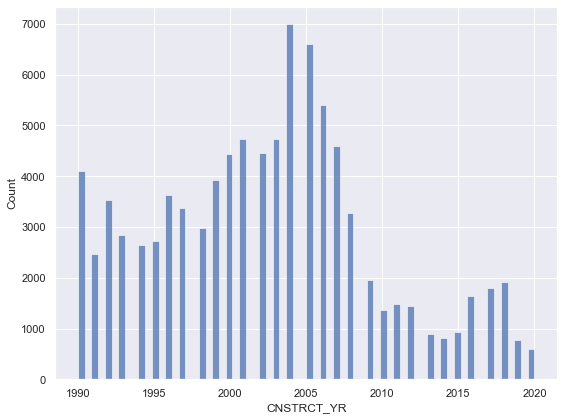

In [6]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-1-a')

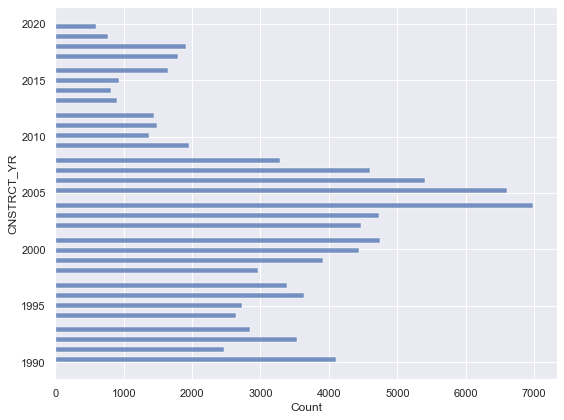

In [7]:
plt.figure(figsize=(8,6))

sns.histplot(y=building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-1-b')

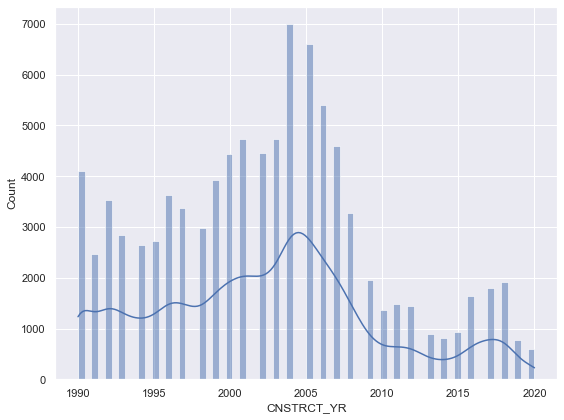

In [8]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             kde=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-c')

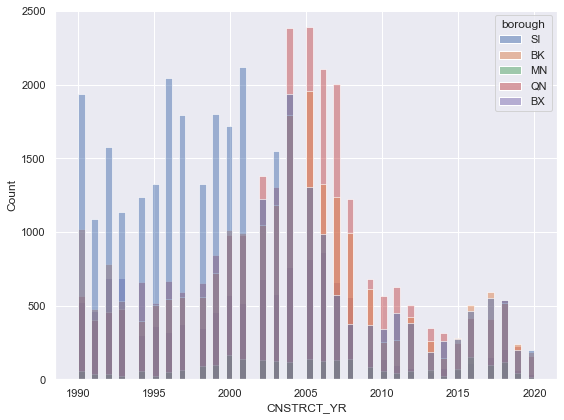

In [9]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough')

plt.tight_layout()
plt.savefig('figures/3-1-1-d')

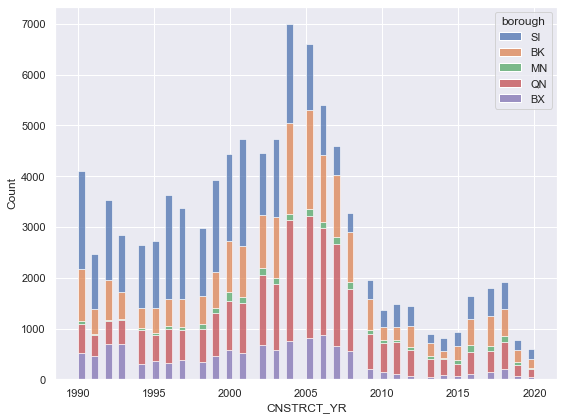

In [10]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough',
             multiple="stack")

plt.tight_layout()
plt.savefig('figures/3-1-1-e')

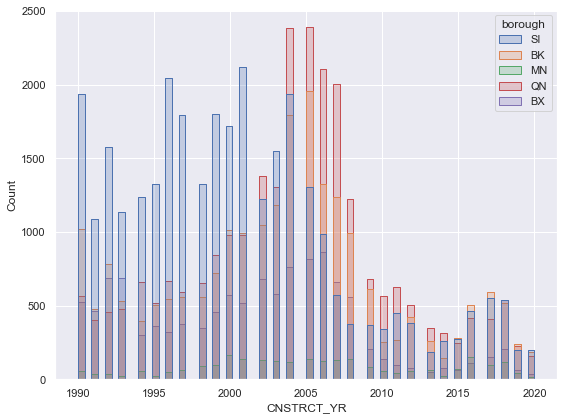

In [11]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             hue='borough',
             element="step")

plt.tight_layout()
plt.savefig('figures/3-1-1-f')

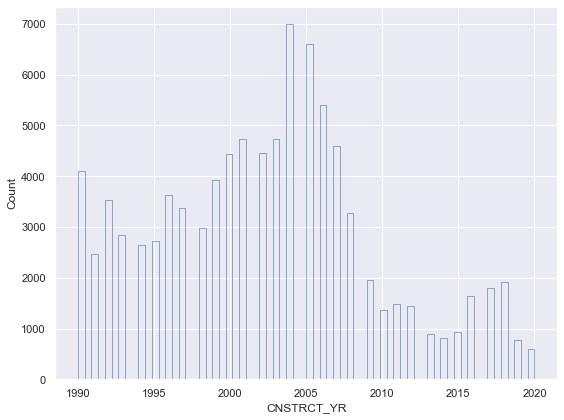

In [12]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             fill=False)

plt.tight_layout()
plt.savefig('figures/3-1-1-g')

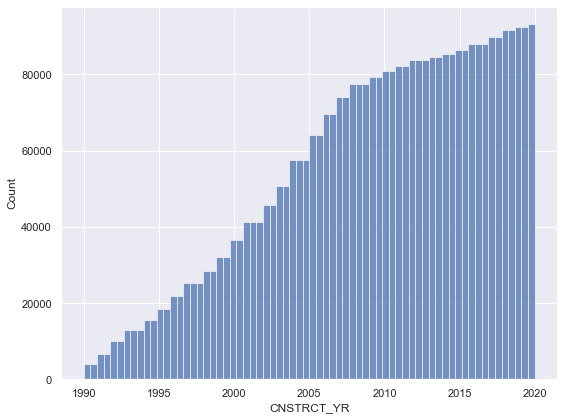

In [13]:
plt.figure(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
            cumulative=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-h')

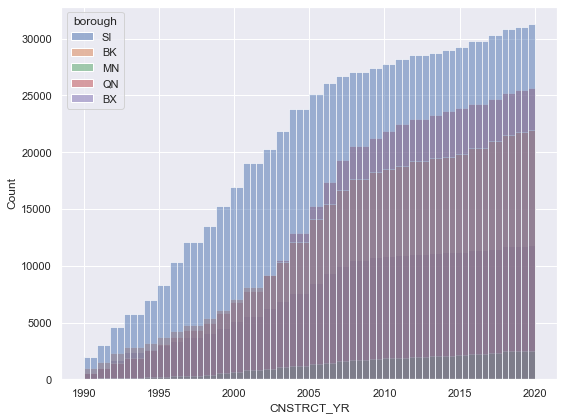

In [14]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True)

plt.tight_layout()
plt.savefig('figures/3-1-1-i')

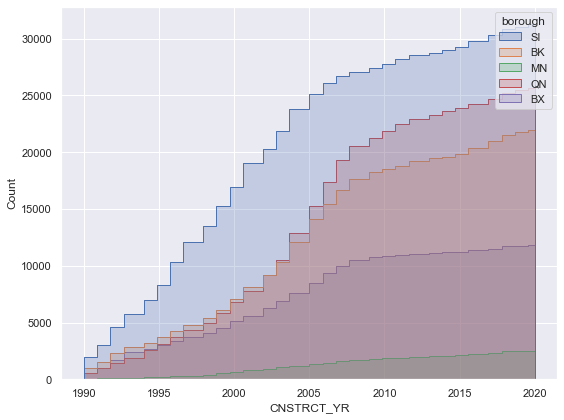

In [15]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True,
             element="step")

plt.tight_layout()
plt.savefig('figures/3-1-1-j')

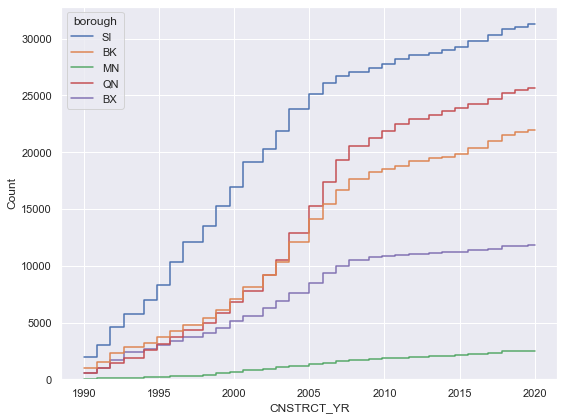

In [16]:
plt.figure(figsize=(8,6))

sns.histplot(data=building_footprints,
             x = 'CNSTRCT_YR',
             hue='borough',
             cumulative=True,
             element="step",
             fill=False)

plt.tight_layout()
plt.savefig('figures/3-1-1-k')

### Kernel Density Estimation (KDE) Plots

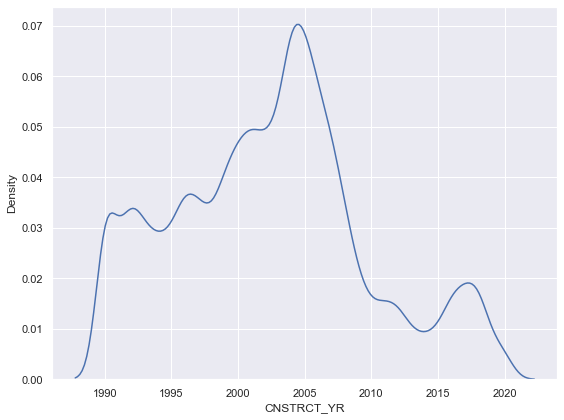

In [17]:
plt.figure(figsize=(8,6))

sns.kdeplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-2-a')

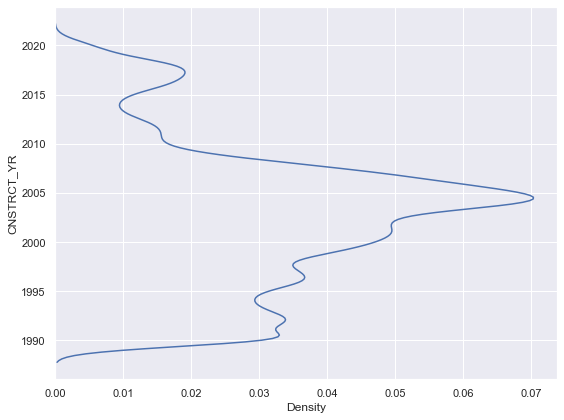

In [18]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            y='CNSTRCT_YR')

plt.tight_layout()
plt.savefig('figures/3-1-2-b')

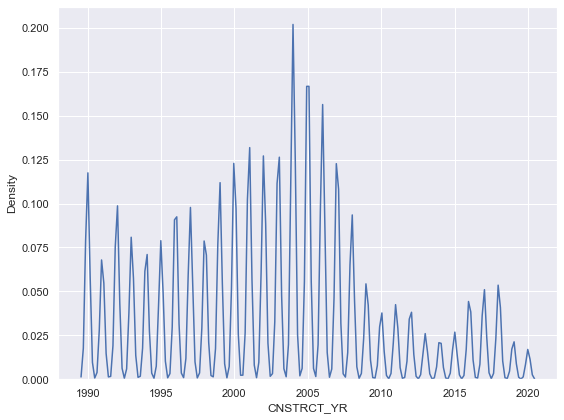

In [19]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            bw_adjust=.2)

plt.tight_layout()
plt.savefig('figures/3-1-2-c')

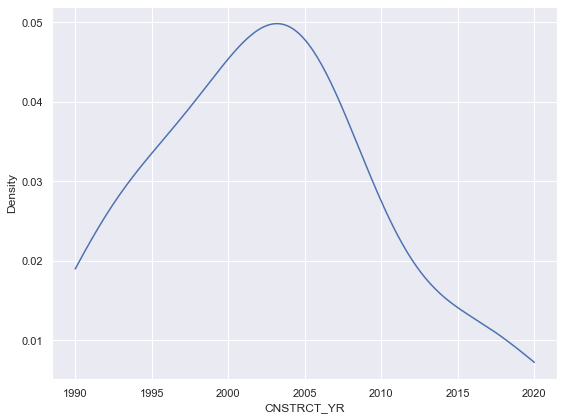

In [20]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            bw_adjust=5, 
            cut=0)

plt.tight_layout()
plt.savefig('figures/3-1-2-d')

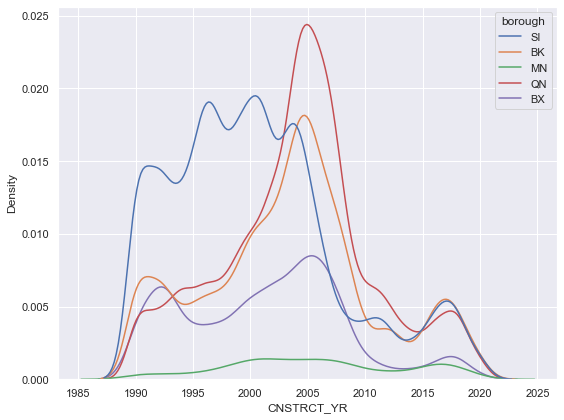

In [21]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough')

plt.tight_layout()
plt.savefig('figures/3-1-2-e')

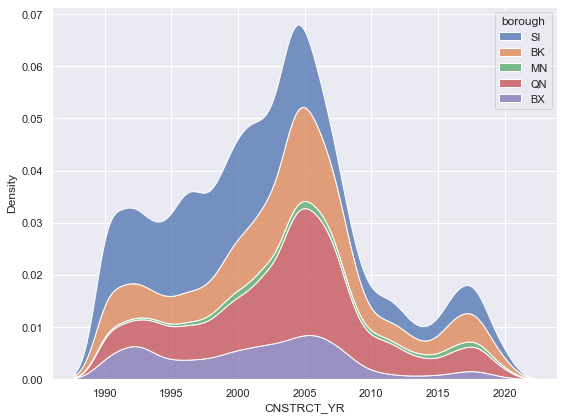

In [22]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='stack')

plt.tight_layout()
plt.savefig('figures/3-1-2-f')

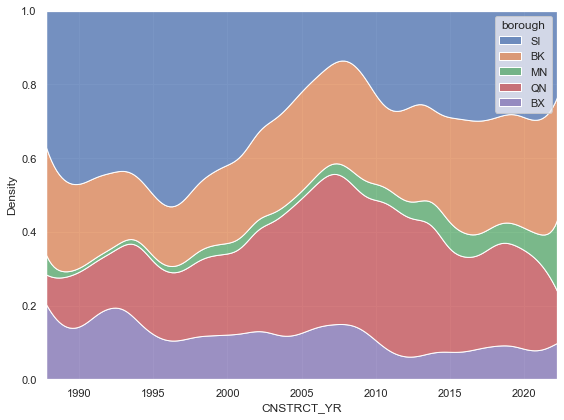

In [23]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='fill')

plt.tight_layout()
plt.savefig('figures/3-1-2-g')

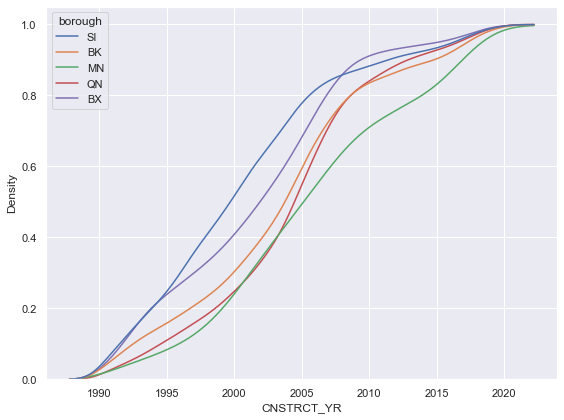

In [24]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            cumulative=True, 
            common_norm=False, 
            common_grid=True)

plt.tight_layout()
plt.savefig('figures/3-1-2-h')

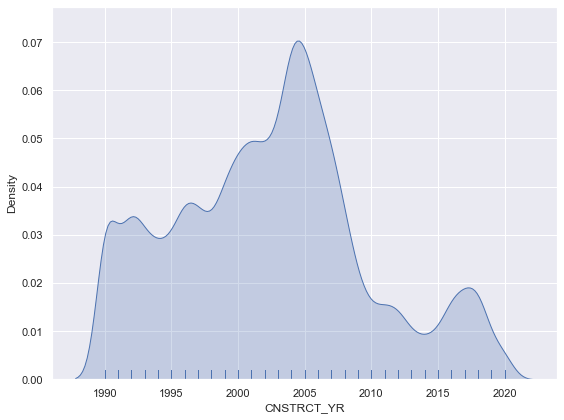

In [25]:
plt.figure(figsize=(8,6))

sns.kdeplot(building_footprints['CNSTRCT_YR'], 
            shade=True)

sns.rugplot(building_footprints['CNSTRCT_YR'])

plt.tight_layout()
plt.savefig('figures/3-1-2-i')

### Empirical Cumulative Distribution Functions (ECDF)

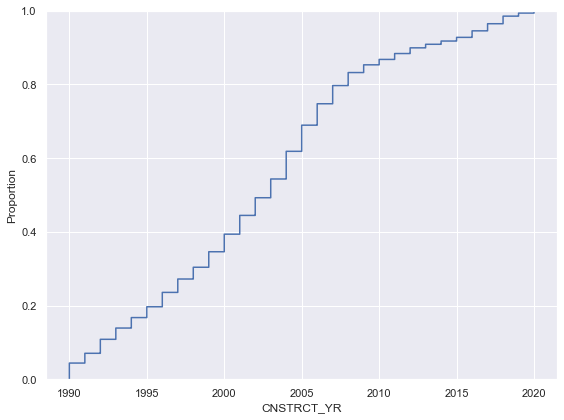

In [26]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-1-3-a')

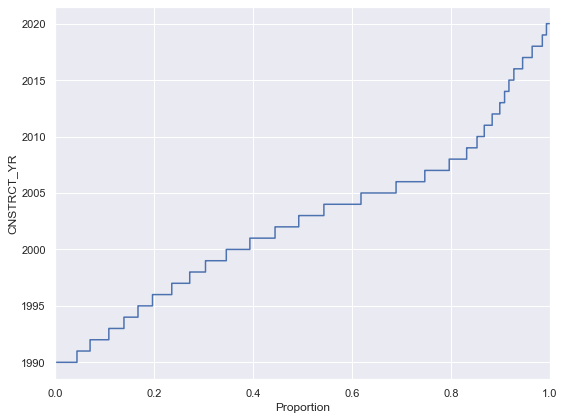

In [27]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             y="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-1-3-b')

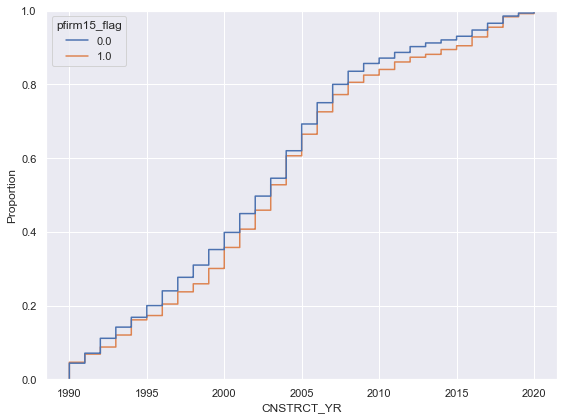

In [28]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-1-3-c')

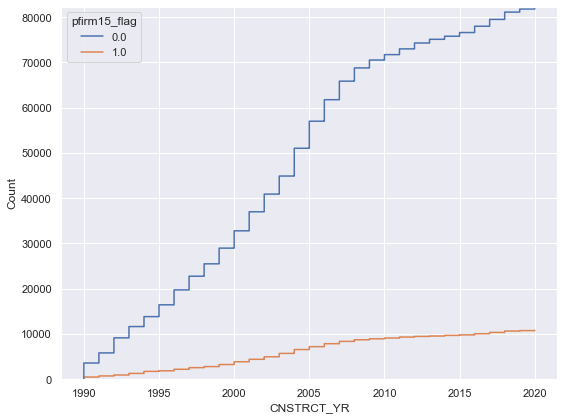

In [29]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             stat="count")

plt.tight_layout()
plt.savefig('figures/3-1-3-d')

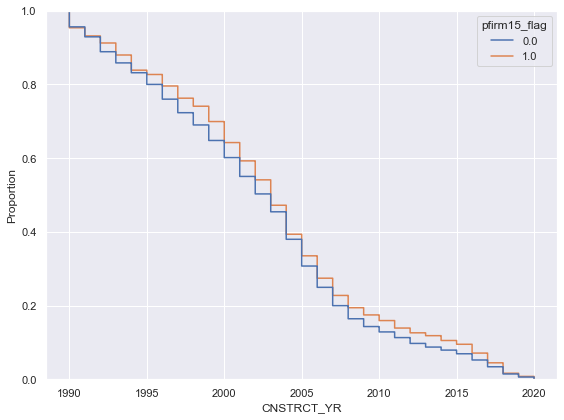

In [30]:
plt.figure(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             complementary=True)

plt.tight_layout()
plt.savefig('figures/3-1-3-e')

### Distribution Plots onto a Facet Grid

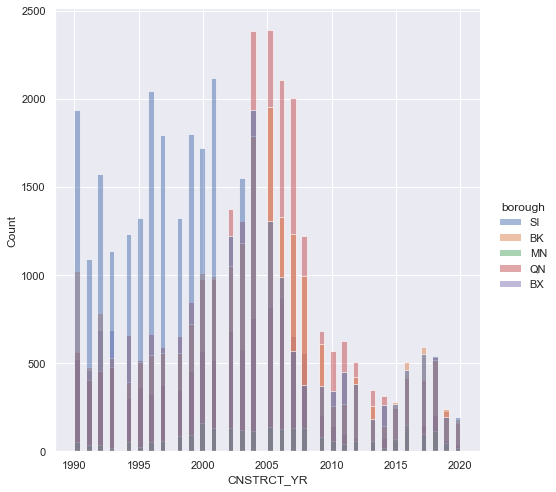

In [31]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            kind="hist",
            height=7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-e', bbox_inches='tight')

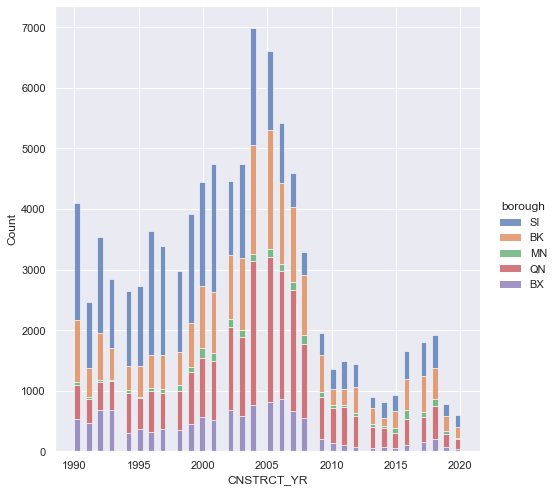

In [32]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            multiple="stack",
            height=7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-f', bbox_inches='tight')

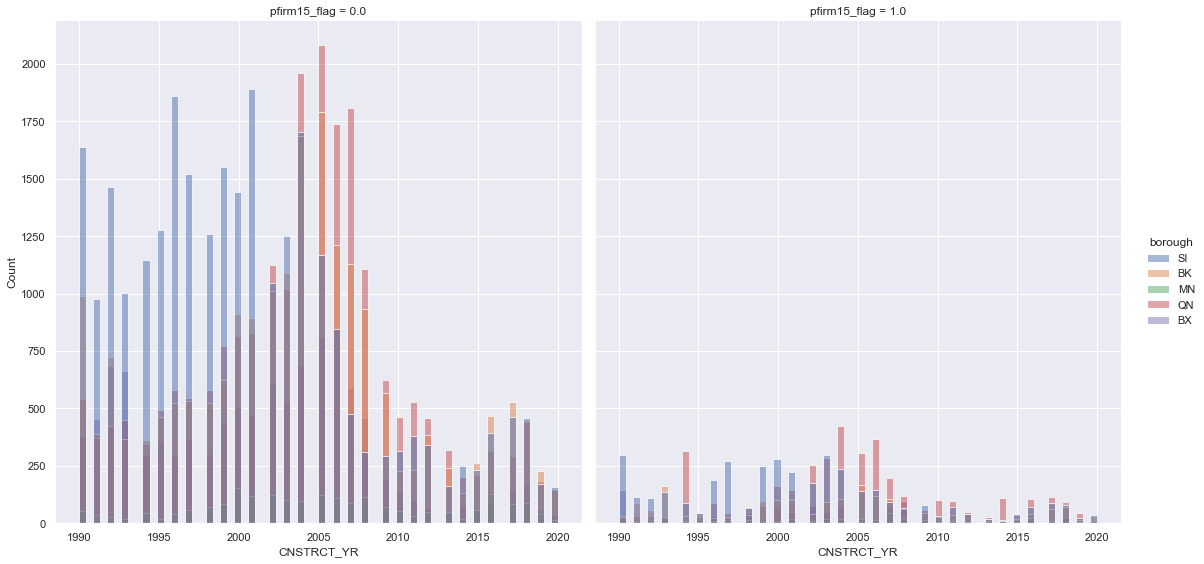

In [33]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="borough", 
            col="pfirm15_flag", 
            kind="hist",
            height=8,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-g', bbox_inches='tight')

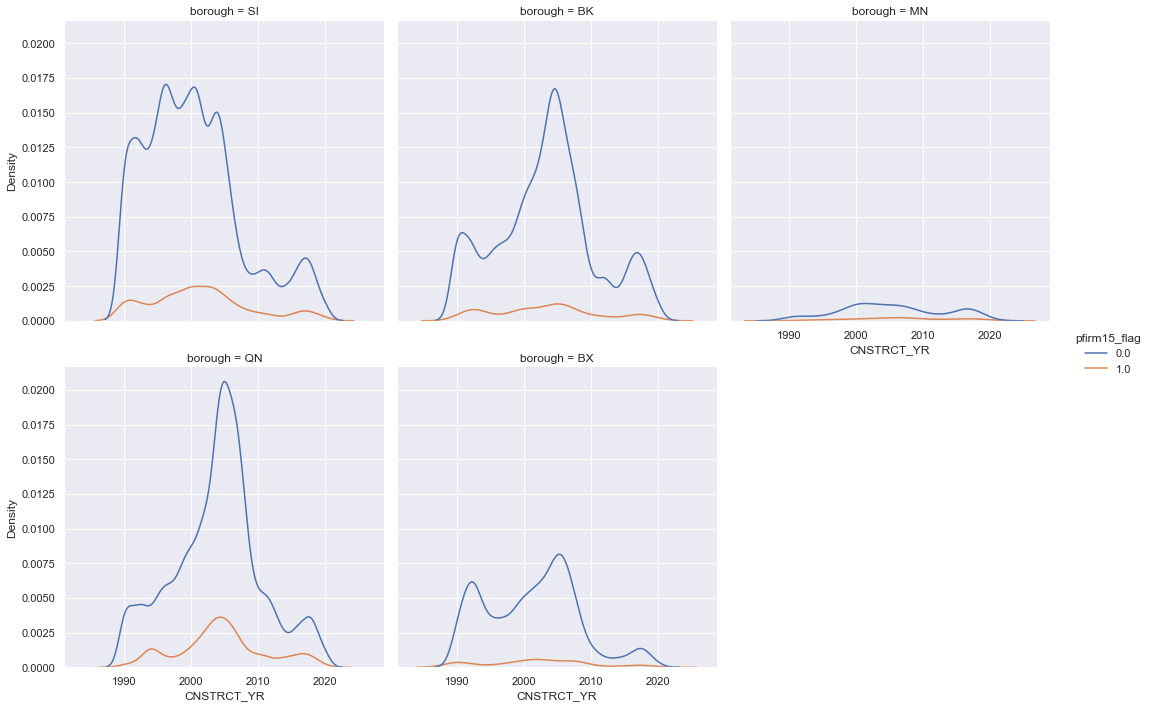

In [34]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="kde",
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-h', bbox_inches='tight')

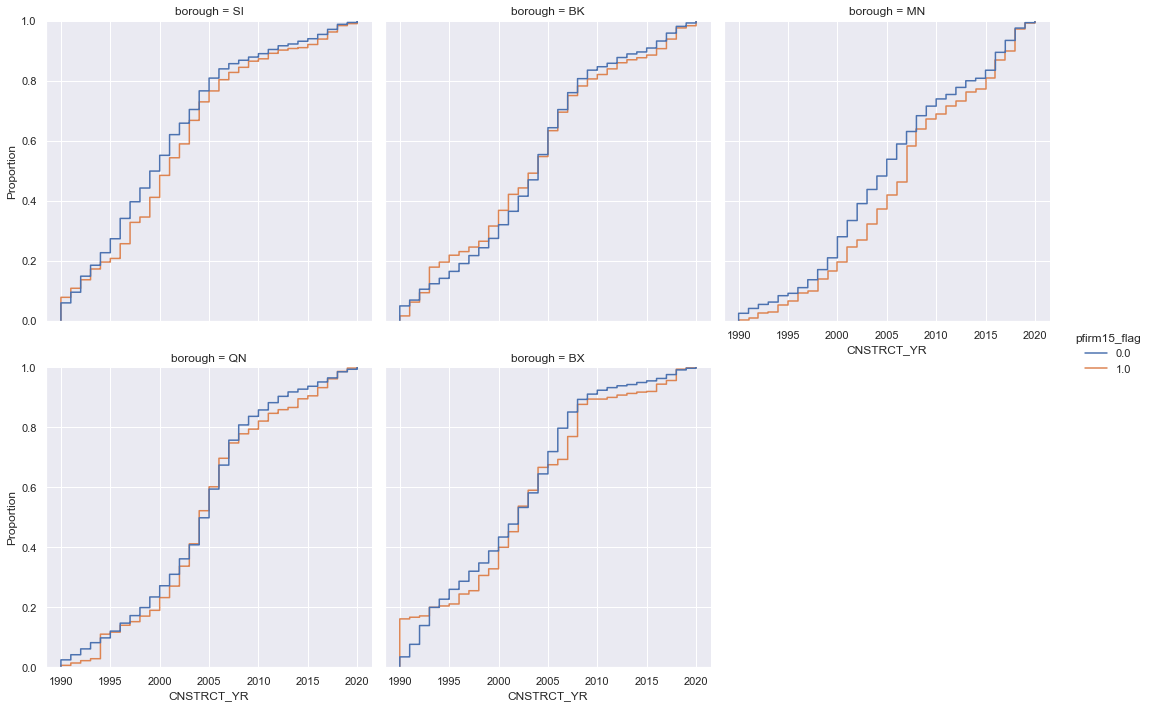

In [35]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="ecdf",
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-1-4-i', bbox_inches='tight')

## Relational Plots

### Line Plot

In [36]:
building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

In [37]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1990   4101
1        1991   2468
2        1992   3532
3        1993   2848
4        1994   2643

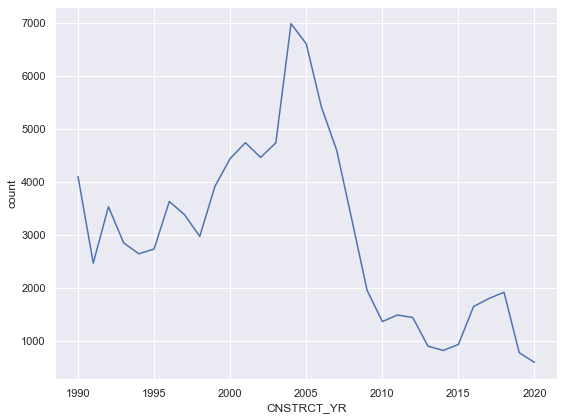

In [38]:
plt.figure(figsize=(8,6))

sns.lineplot(data=by_year, 
             x="CNSTRCT_YR", 
             y="count")

plt.tight_layout()
plt.savefig('figures/3-2-1-a')

In [39]:
line_pivot = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc='count')

line_pivot.head()

borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990.0      1022  525  55  565  1934
1991.0       477  461  37  402  1091
1992.0       783  687  35  454  1573
1993.0       528  687  19  476  1138
1994.0       393  301  54  661  1234

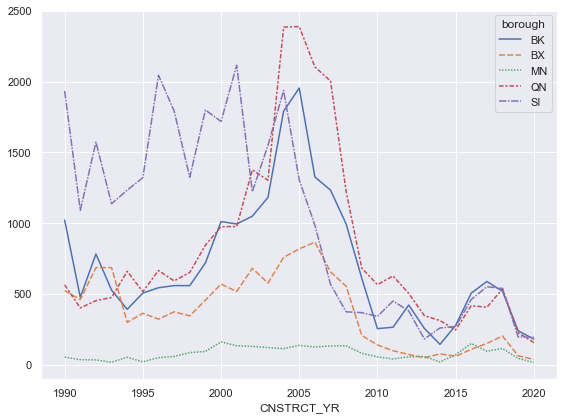

In [40]:
plt.figure(figsize=(8,6))

sns.lineplot(data=line_pivot)

plt.tight_layout()
plt.savefig('figures/3-2-1-b')

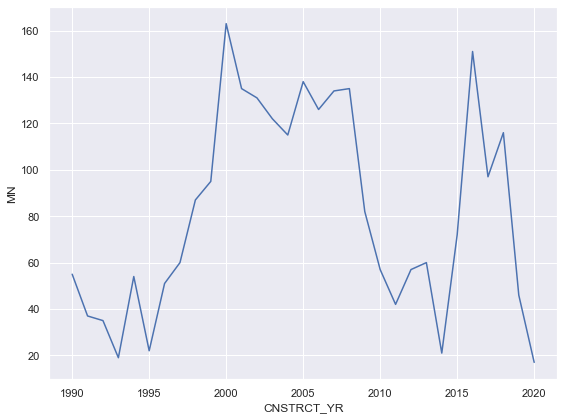

In [41]:
plt.figure(figsize=(8,6))

sns.lineplot(data=line_pivot['MN'])

plt.tight_layout()
plt.savefig('figures/3-2-1-c')

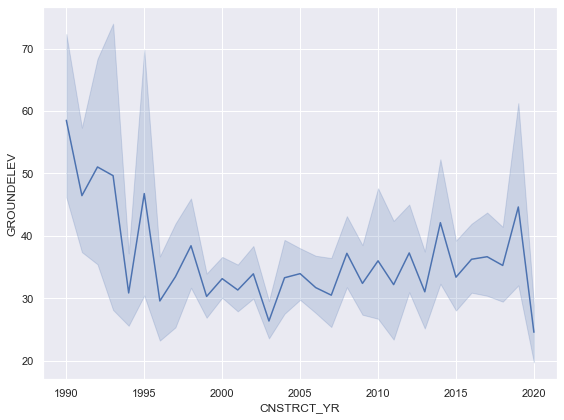

In [42]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints.loc[building_footprints['borough'] == 'MN'], 
             x="CNSTRCT_YR", 
             y="GROUNDELEV")

plt.tight_layout()
plt.savefig('figures/3-2-1-d')

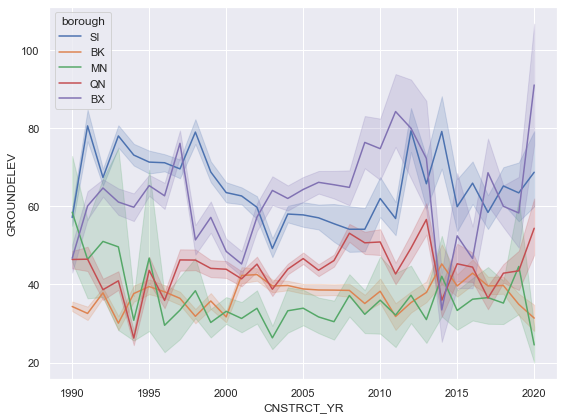

In [43]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough')

plt.tight_layout()
plt.savefig('figures/3-2-1-e')

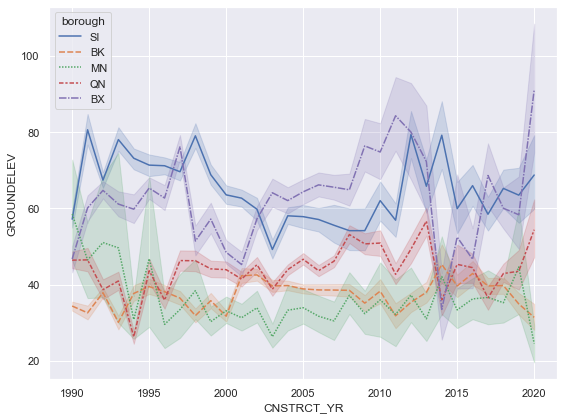

In [44]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough',
             style='borough')

plt.tight_layout()
plt.savefig('figures/3-2-1-f')

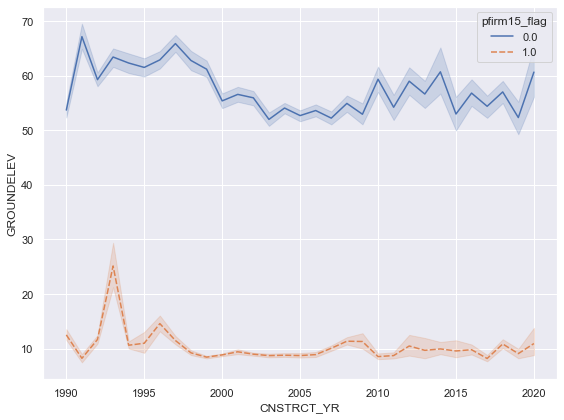

In [45]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='pfirm15_flag',
             style='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-2-1-g')

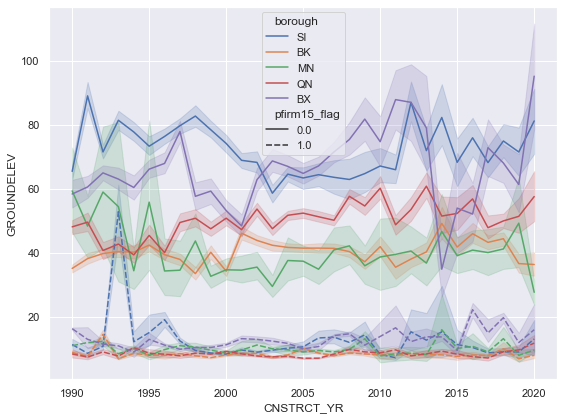

In [46]:
plt.figure(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough',
             style='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-2-1-h')

<Figure size 576x432 with 0 Axes>

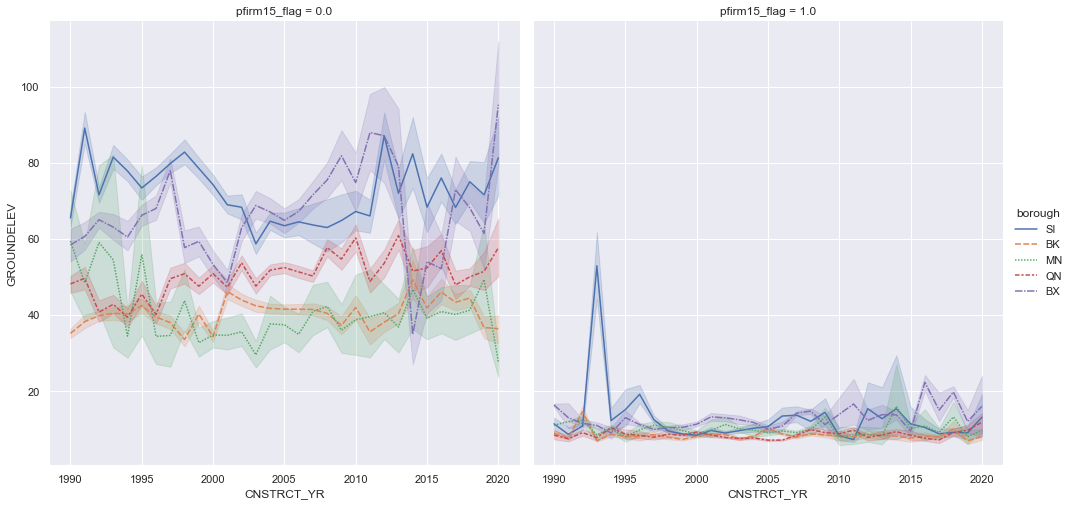

In [47]:
plt.figure(figsize=(8,6))

sns.relplot(data=building_footprints, 
            x="CNSTRCT_YR", 
            y="GROUNDELEV",
            col="pfirm15_flag", 
            hue="borough", 
            style="borough",
            kind="line",
            height = 7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-1-i', bbox_inches='tight')

### Scatter Plots

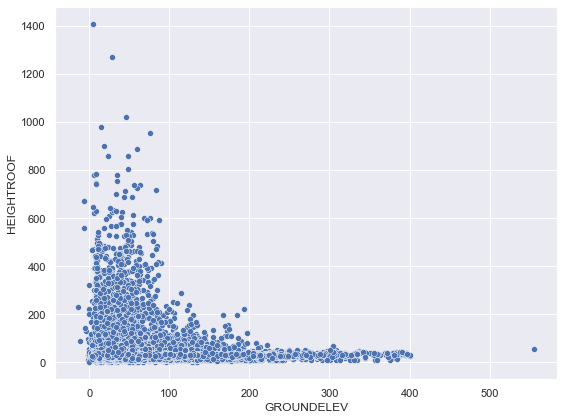

In [48]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'])

plt.tight_layout()
plt.savefig('figures/3-2-2-a')

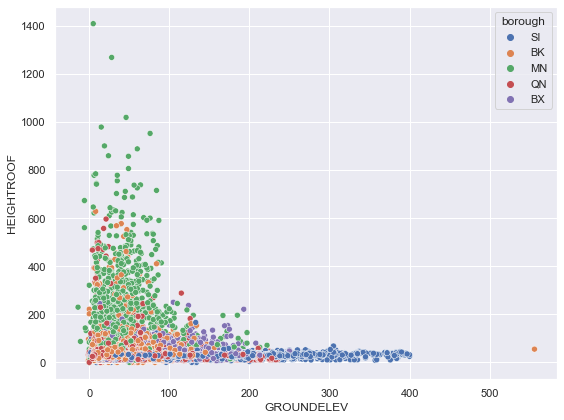

In [49]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.tight_layout()
plt.savefig('figures/3-2-2-b')

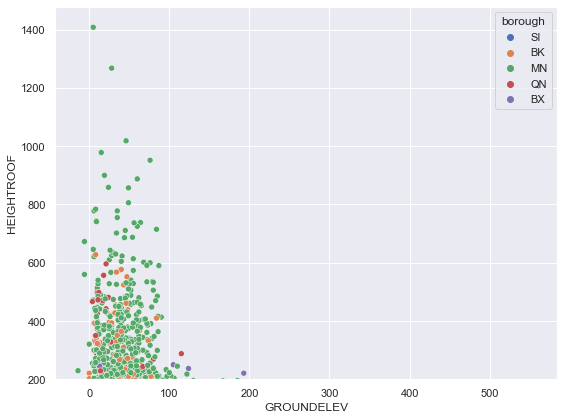

In [50]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.ylim(bottom=200)
plt.tight_layout()
plt.savefig('figures/3-2-2-c')

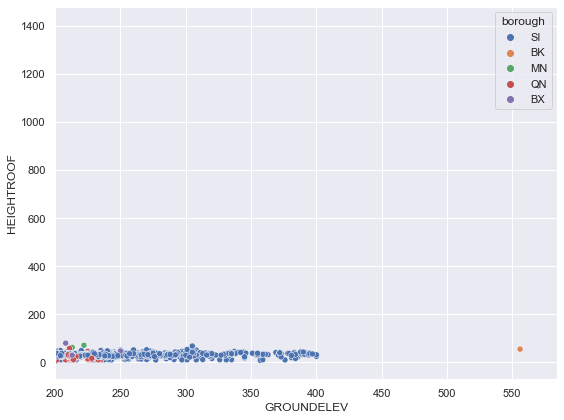

In [51]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.xlim(left=200)
plt.tight_layout()
plt.savefig('figures/3-2-2-d')

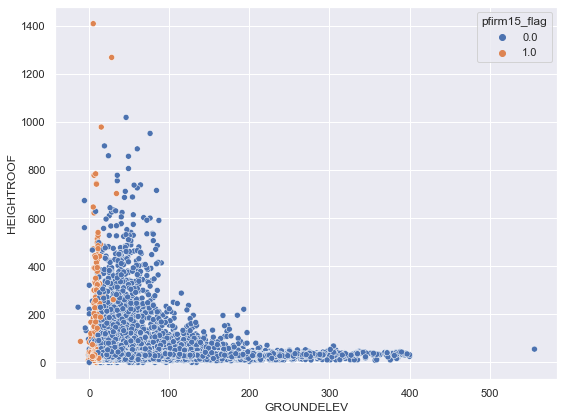

In [52]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/3-2-2-e')

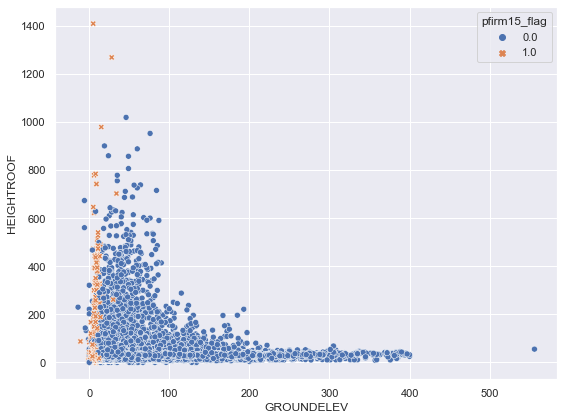

In [53]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/3-2-2-f')

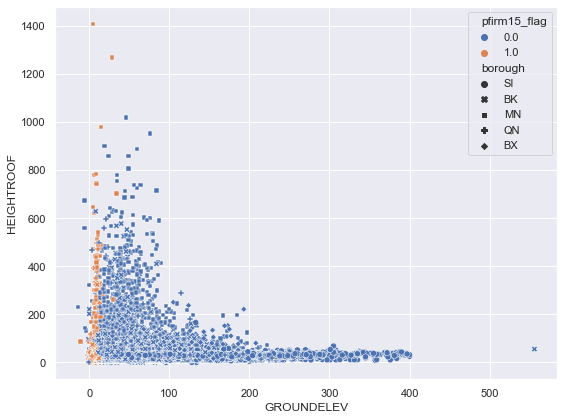

In [54]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="borough")

plt.tight_layout()
plt.savefig('figures/3-2-2-g')

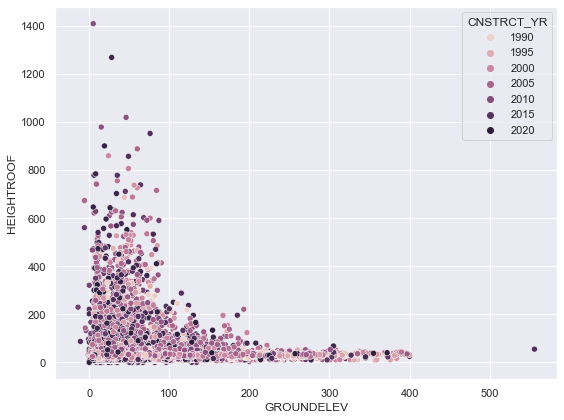

In [55]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-2-2-h')

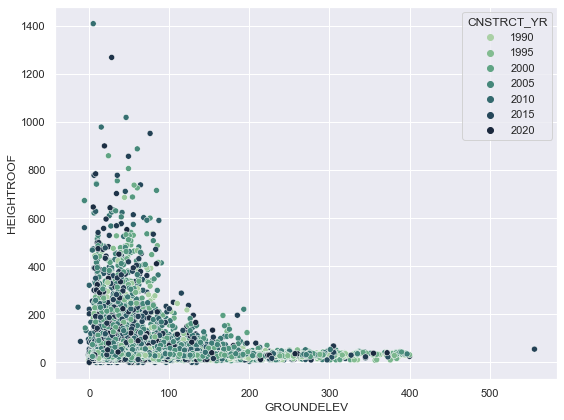

In [56]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR", 
                palette="ch:r=-.5,l=.75")

plt.tight_layout()
plt.savefig('figures/3-2-2-i')

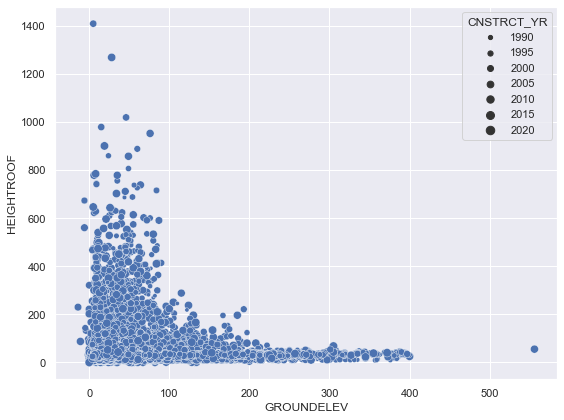

In [57]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/3-2-2-j')

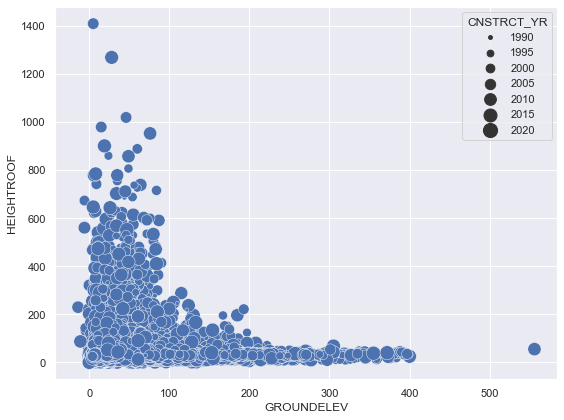

In [58]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.tight_layout()
plt.savefig('figures/3-2-2-k')

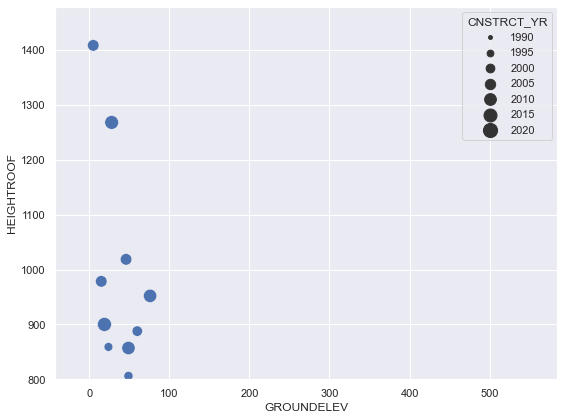

In [59]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.ylim(bottom=800)
plt.tight_layout()
plt.savefig('figures/3-2-2-l')

### Relational Plots onto a Facet Grid

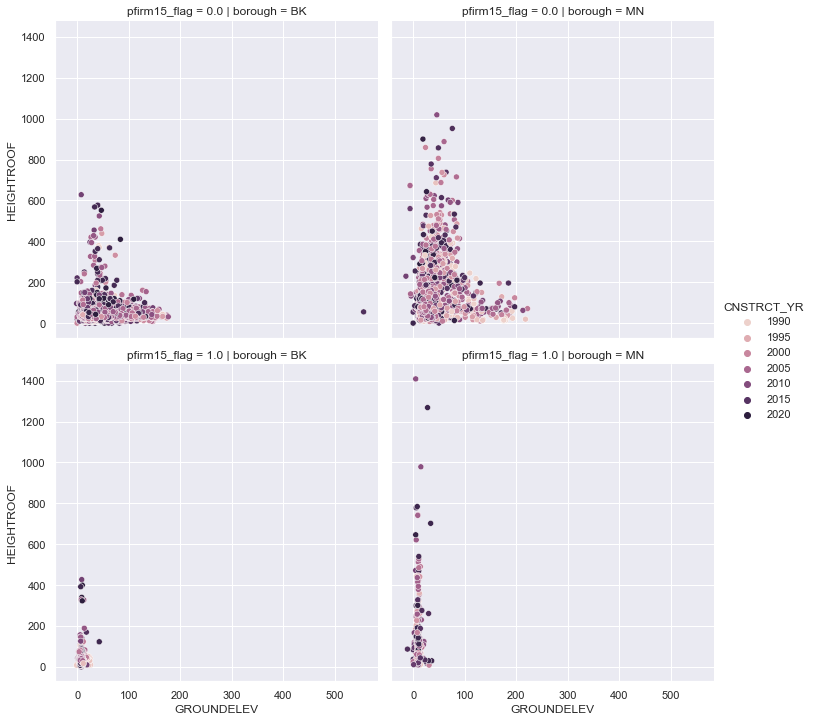

In [60]:
sns.relplot(data=building_footprints.loc[building_footprints['borough'].isin(["MN", "BK"])], 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="CNSTRCT_YR", 
            col="borough", 
            row="pfirm15_flag",
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-a', bbox_inches='tight')

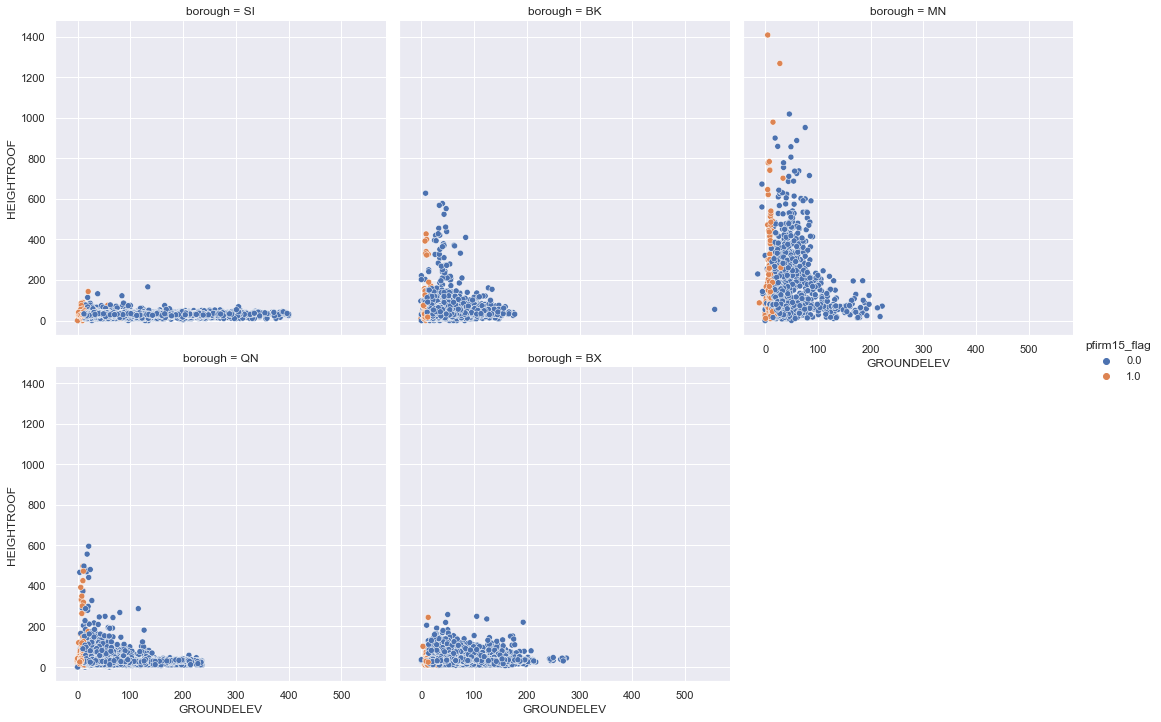

In [61]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="pfirm15_flag", 
            col="borough", 
            col_wrap=3,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-b', bbox_inches='tight')

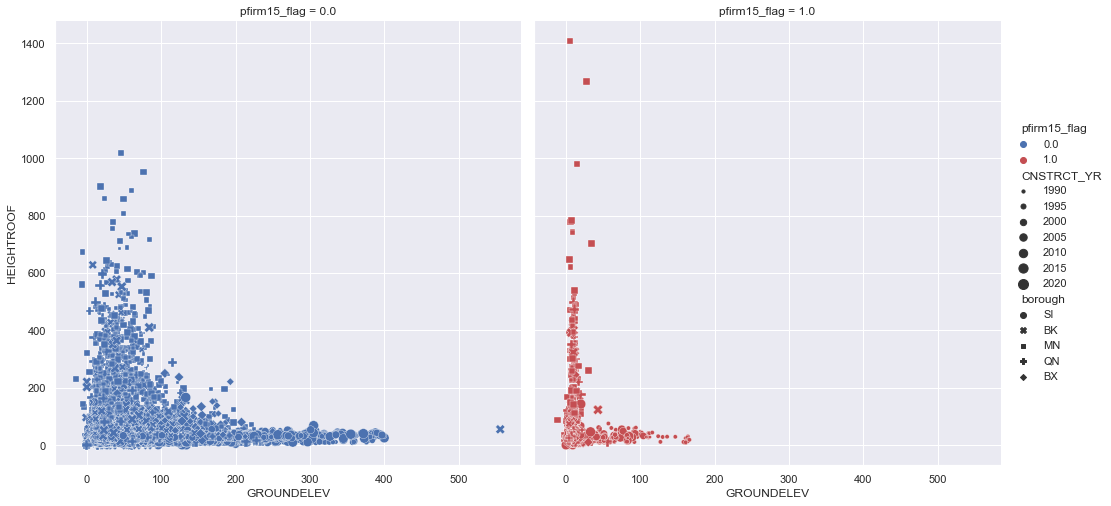

In [62]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            col="pfirm15_flag",
            hue="pfirm15_flag", 
            size="CNSTRCT_YR", 
            style="borough",
            palette=["b", "r"], 
            sizes=(10, 100),
            height=7,
            facet_kws={"legend_out": True})

plt.savefig('figures/3-2-3-c', bbox_inches='tight')

## Joint Grids

### Scatter Plots

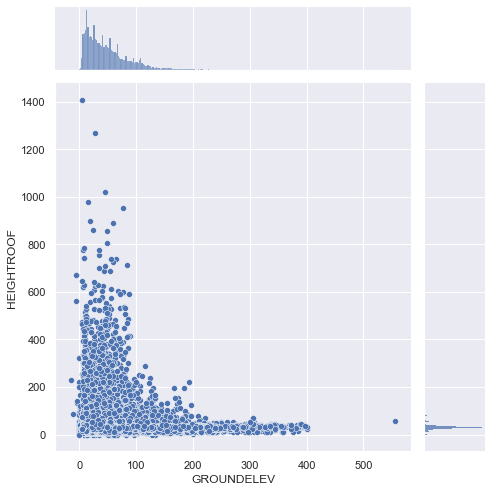

In [63]:
sns.jointplot(x='GROUNDELEV',
              y='HEIGHTROOF',
              data=building_footprints,
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-1-a')

### Hexbin Plots

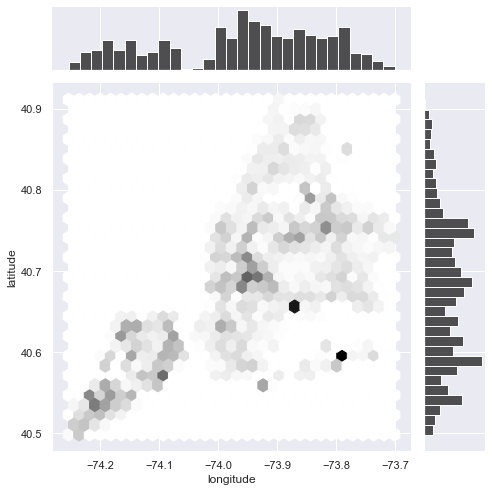

In [64]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude',
              y='latitude', 
              data=sample,
              kind="hex", 
              color="k", 
              height=7) 

plt.tight_layout()
plt.savefig('figures/3-3-2-a')

### Kernel Density Estimation

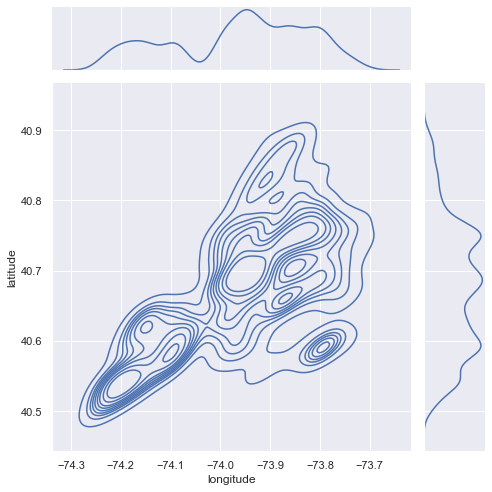

In [65]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-3-a')

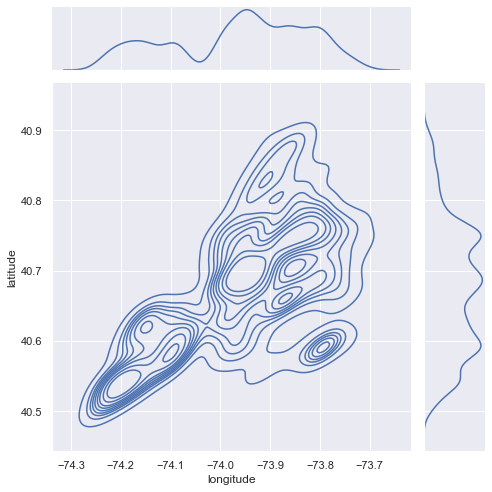

In [66]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              shade=False, 
              height=7)

plt.tight_layout()
plt.savefig('figures/3-3-3-b')

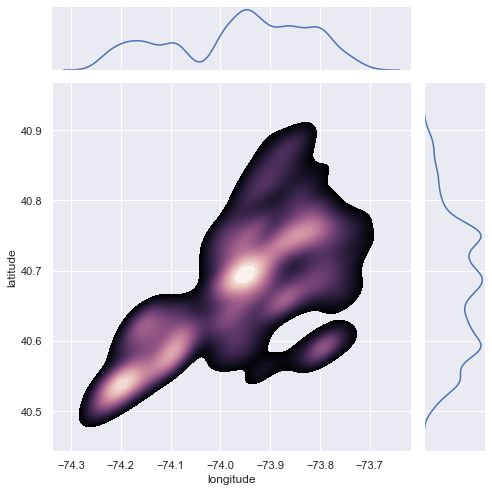

In [67]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

cmap = sns.cubehelix_palette(as_cmap=True, 
                             dark=0, 
                             light=1, 
                             reverse=True)

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample, 
              kind="kde", 
              height=7, 
              cmap=cmap, 
              n_levels=60, 
              shade=True)

plt.tight_layout()
plt.savefig('figures/3-3-3-c')

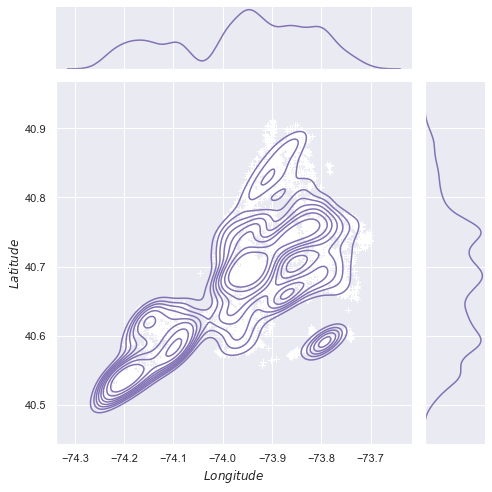

In [68]:
sample = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

g = sns.jointplot(x='longitude', 
                  y='latitude', 
                  data=sample, 
                  kind="kde", 
                  color="m", 
                  height=7)

g.plot_joint(plt.scatter, 
             c="w", 
             s=30, 
             linewidth=1,
             marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Longitude$", "$Latitude$")
plt.tight_layout()
plt.savefig('figures/3-3-3-d')

## Visualizing Pairwise Relationships in a Dataset

### Pair Plot

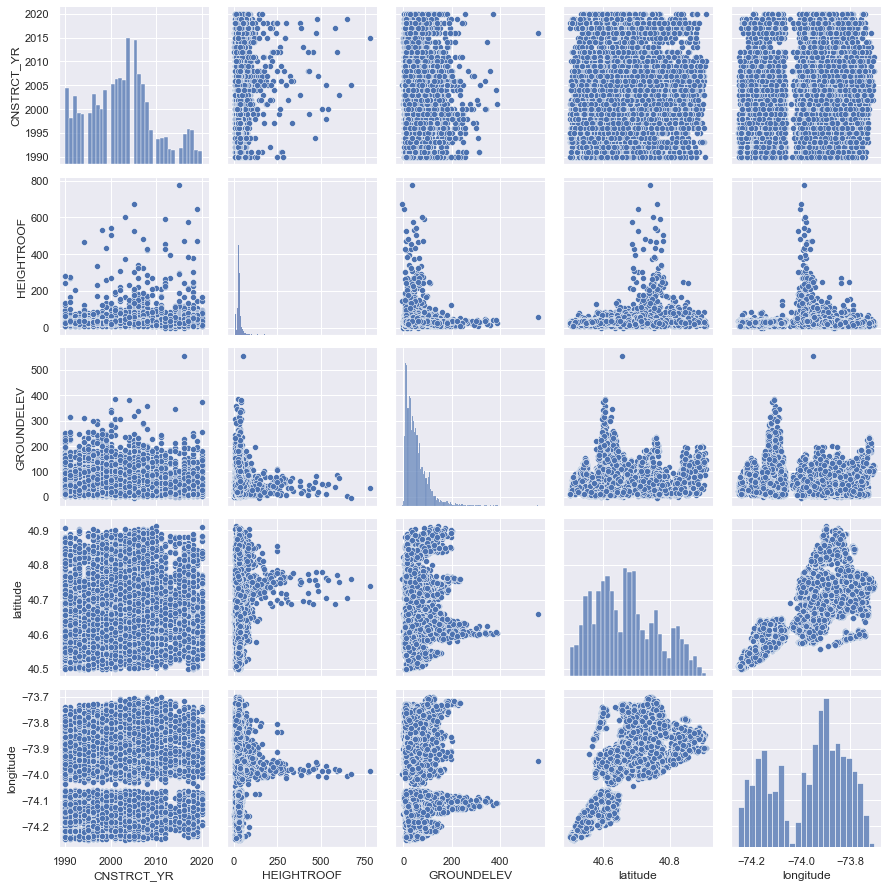

In [69]:
selected = building_footprints[['borough', 
                                'CNSTRCT_YR', 
                                'HEIGHTROOF', 
                                'GROUNDELEV',  
                                'latitude', 
                                'longitude']]

selected = selected.sample(10000)

sns.pairplot(selected)

plt.tight_layout()
plt.savefig('figures/3-4-a')

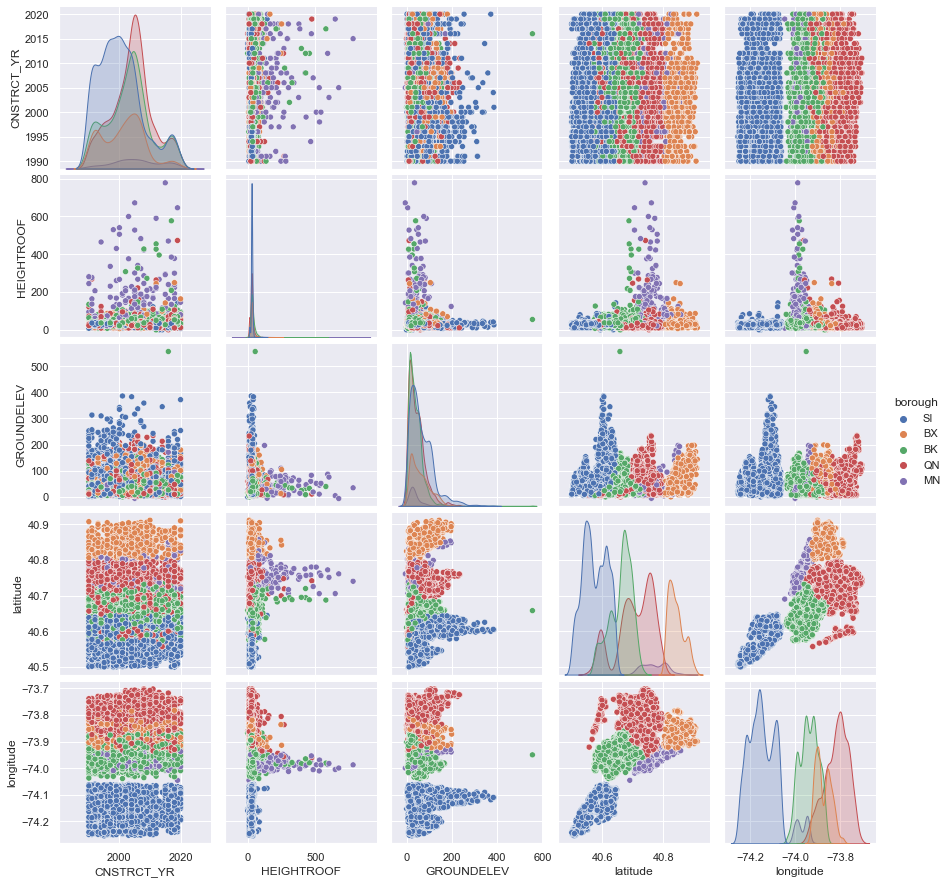

In [70]:
sns.pairplot(selected, 
             hue="borough")

plt.savefig('figures/3-4-b', bbox_inches='tight')

### Heat Maps

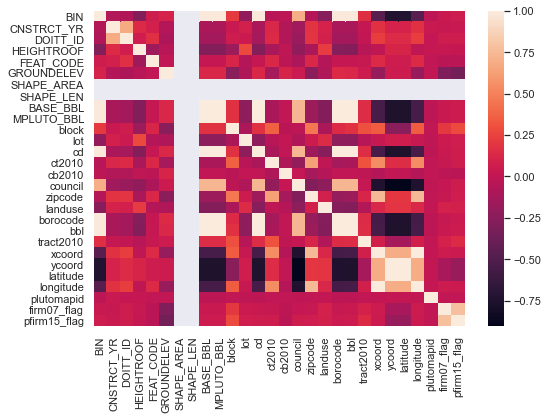

In [71]:
plt.figure(figsize=(8,6))

sns.heatmap(building_footprints.corr())

plt.tight_layout()
plt.savefig('figures/3-5-a')

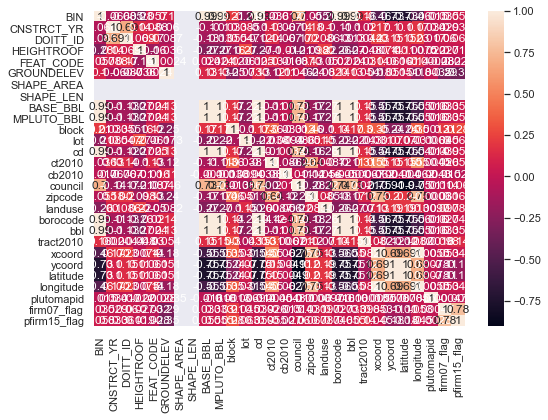

In [72]:
plt.figure(figsize=(8,6))

sns.heatmap(building_footprints.corr(), annot=True)

plt.tight_layout()
plt.savefig('figures/3-5-b')

## Categorical Plots

In [73]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93117 entries, 0 to 93116
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the_geom      93117 non-null  object 
 1   NAME          239 non-null    object 
 2   BIN           93117 non-null  int64  
 3   CNSTRCT_YR    93117 non-null  float64
 4   LSTMODDATE    93117 non-null  object 
 5   LSTSTATYPE    93043 non-null  object 
 6   DOITT_ID      93117 non-null  int64  
 7   HEIGHTROOF    91484 non-null  float64
 8   FEAT_CODE     93115 non-null  float64
 9   GROUNDELEV    92857 non-null  float64
 10  SHAPE_AREA    93117 non-null  int64  
 11  SHAPE_LEN     93117 non-null  int64  
 12  BASE_BBL      93117 non-null  float64
 13  MPLUTO_BBL    93117 non-null  float64
 14  GEOMSOURCE    93060 non-null  object 
 15  borough       93117 non-null  object 
 16  block         93117 non-null  int64  
 17  lot           93117 non-null  int64  
 18  cd            93094 non-nu

### Count Plot

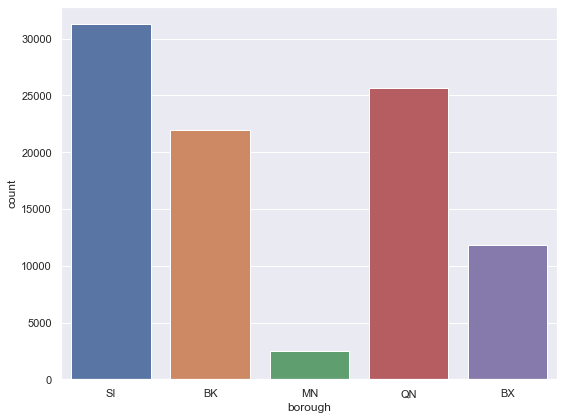

In [74]:
plt.figure(figsize=(8,6))

sns.countplot(x="borough", 
              data=building_footprints)

plt.tight_layout()
plt.savefig('figures/3-6-1-a')

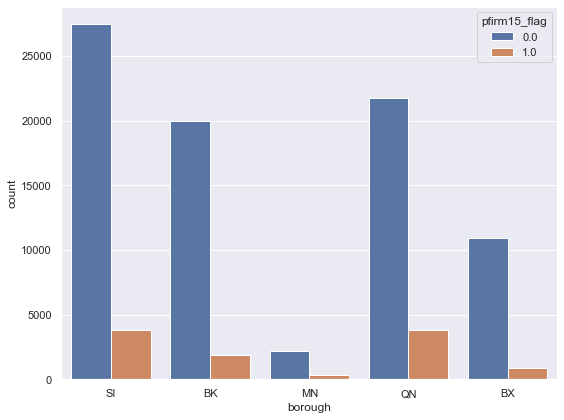

In [75]:
plt.figure(figsize=(8,6))

sns.countplot(x="borough", 
              data=building_footprints,
              hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-1-b')

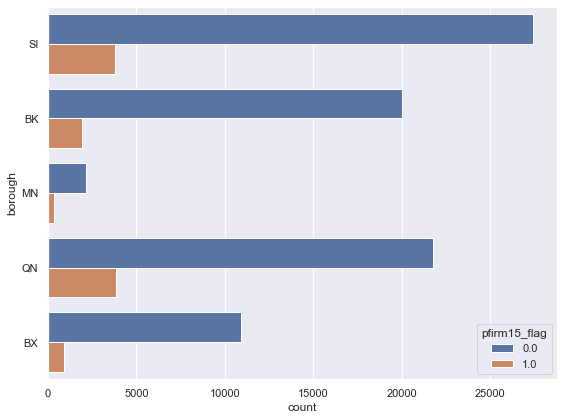

In [76]:
plt.figure(figsize=(8,6))

sns.countplot(y="borough", 
              data=building_footprints,
              hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-1-c')

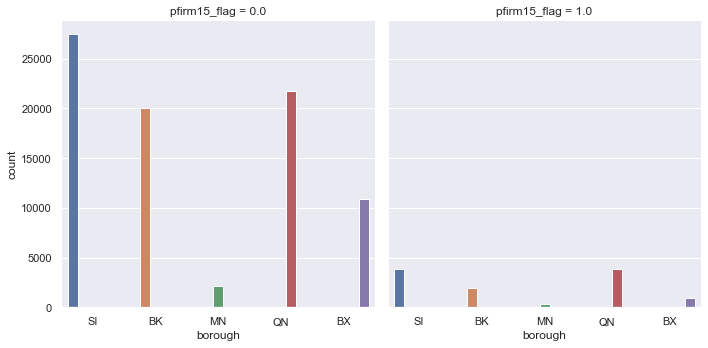

In [77]:
sns.catplot(x="borough", 
            data=building_footprints,
            col='pfirm15_flag',
            hue='borough',
            kind='count',
            height=5)

plt.tight_layout()
plt.savefig('figures/3-6-1-d')

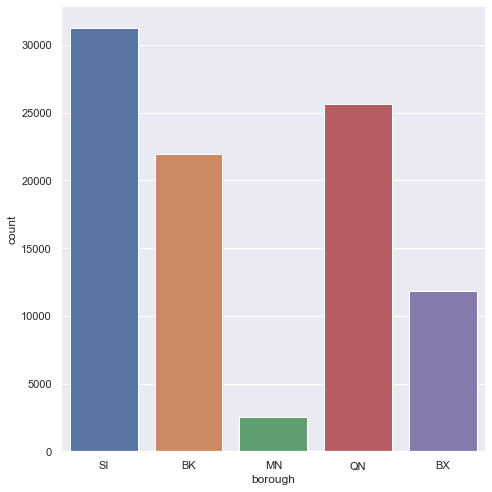

In [78]:
sns.catplot(x="borough", 
            kind="count", 
            data = building_footprints, 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-e')

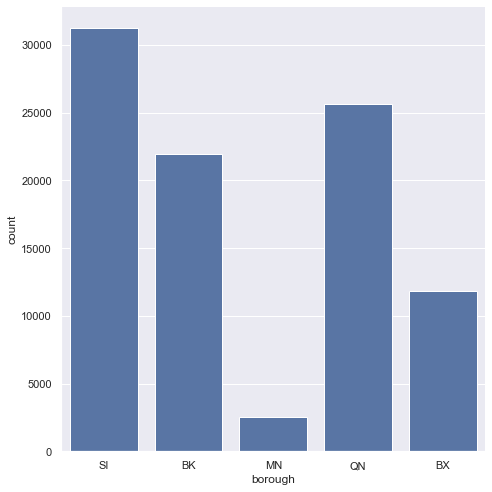

In [79]:
sns.catplot(x="borough", 
            kind="count", 
            data = building_footprints, 
            color="C0", 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-f')

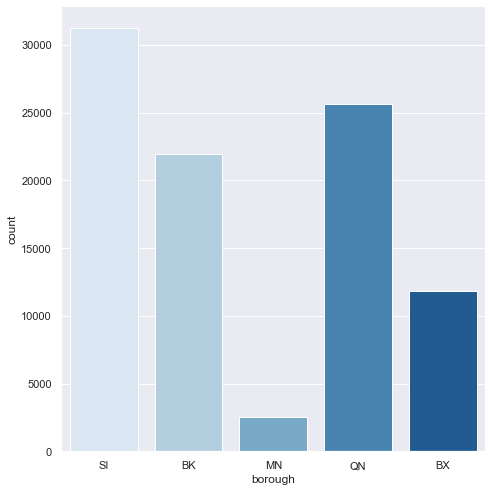

In [80]:
sns.catplot(x="borough", 
            kind="count", 
            palette="Blues", 
            data = building_footprints, 
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-g')

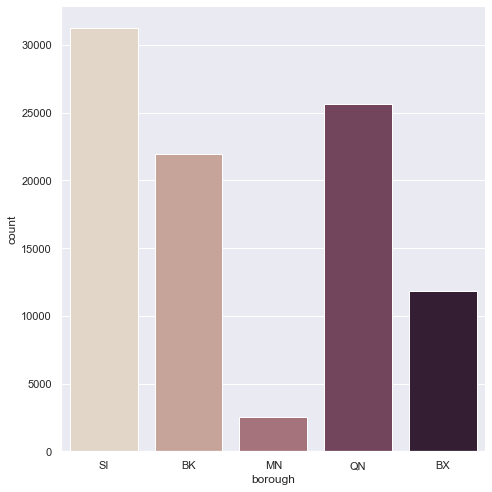

In [81]:
sns.catplot(x="borough", 
            kind="count", 
            palette="ch:.25", 
            data = building_footprints,  
            height = 7)

plt.tight_layout()
plt.savefig('figures/3-6-1-h')

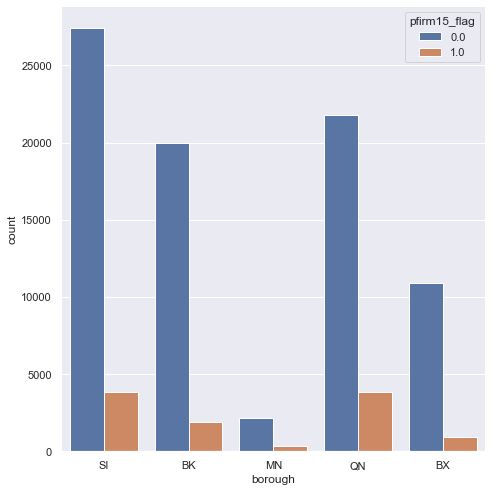

In [82]:
sns.catplot(x="borough",  
            hue="pfirm15_flag", 
            kind="count", 
            data=building_footprints, 
            height = 7, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-i')

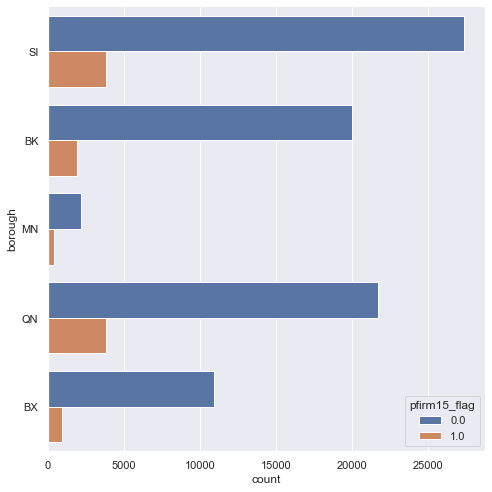

In [83]:
sns.catplot(y="borough",  
            hue="pfirm15_flag", 
            kind="count", 
            data=building_footprints, 
            height = 7, 
            estimator=np.median, 
            ci=None, 
            legend=False)

plt.legend(loc='best', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-j')

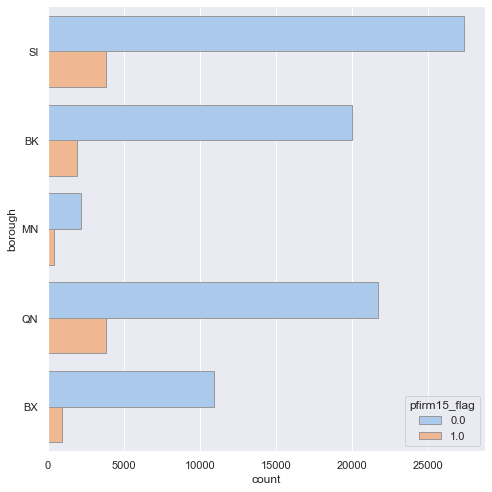

In [84]:
sns.catplot(y="borough", 
            hue="pfirm15_flag", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=building_footprints, 
            height = 7, 
            legend=False)

plt.legend(loc='best', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-1-k')

### Bar Plot

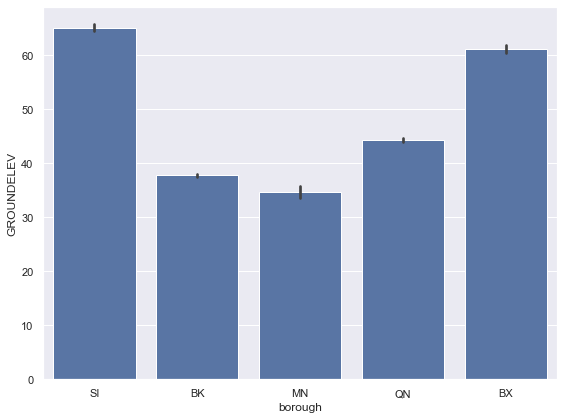

In [85]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV', 
            color="C0")

plt.tight_layout()
plt.savefig('figures/3-6-2-a')

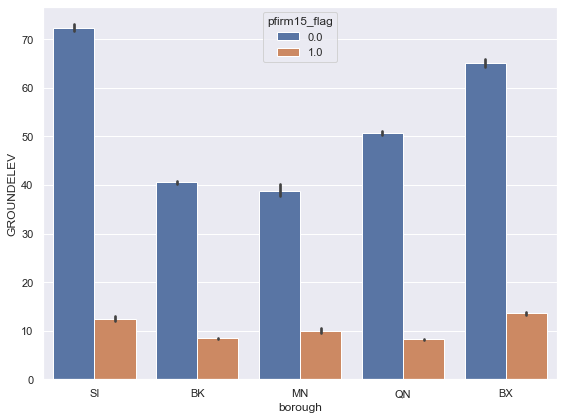

In [86]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-2-b')

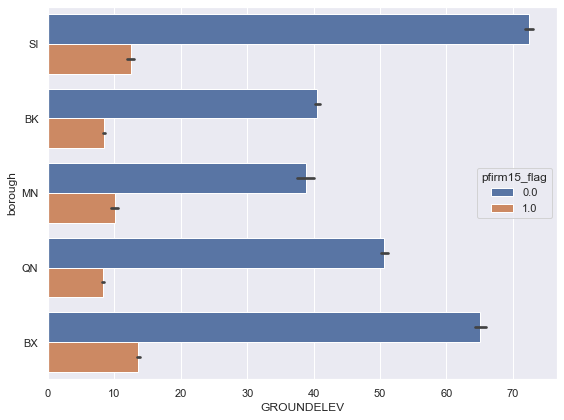

In [87]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='GROUNDELEV',  
            y= 'borough',
            hue='pfirm15_flag')

plt.tight_layout()
plt.savefig('figures/3-6-2-c')

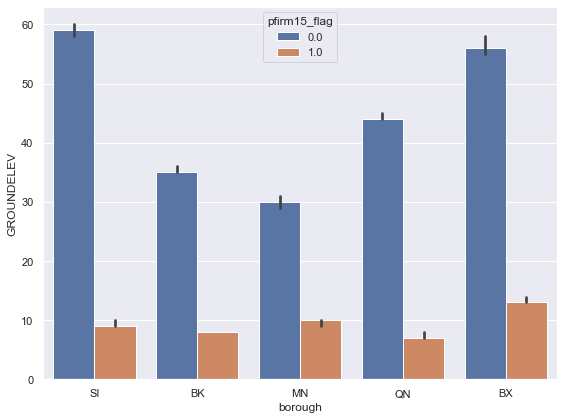

In [88]:
from numpy import median

plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            estimator=median)

plt.tight_layout()
plt.savefig('figures/3-6-2-d')

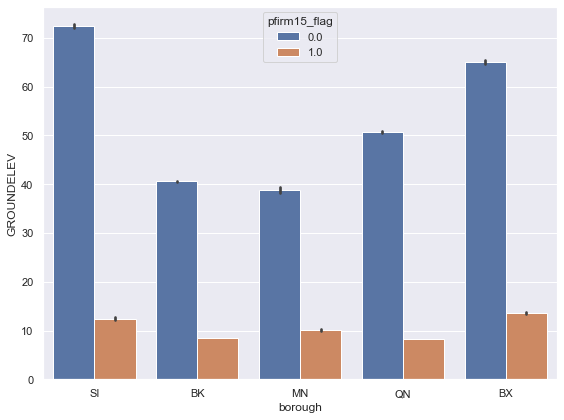

In [89]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            ci=68)

plt.tight_layout()
plt.savefig('figures/3-6-2-e')

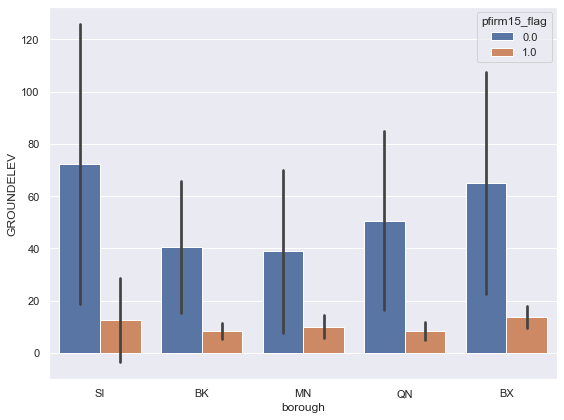

In [90]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            ci='sd')

plt.tight_layout()
plt.savefig('figures/3-6-2-f')

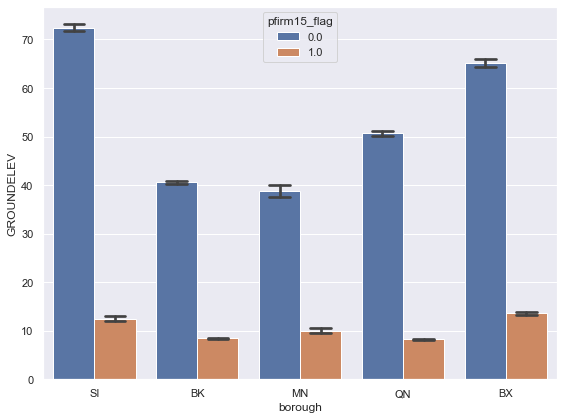

In [91]:
plt.figure(figsize=(8,6))

sns.barplot(data=building_footprints,
            x='borough',  
            y= 'GROUNDELEV',
            hue='pfirm15_flag',
            capsize=.2)

plt.tight_layout()
plt.savefig('figures/3-6-2-g')

### Scatter Plot

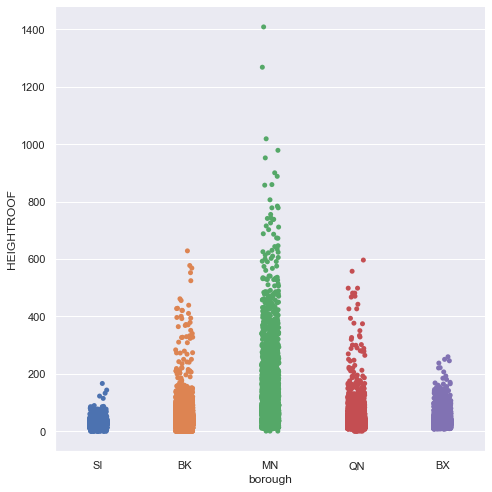

In [92]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-3-a')

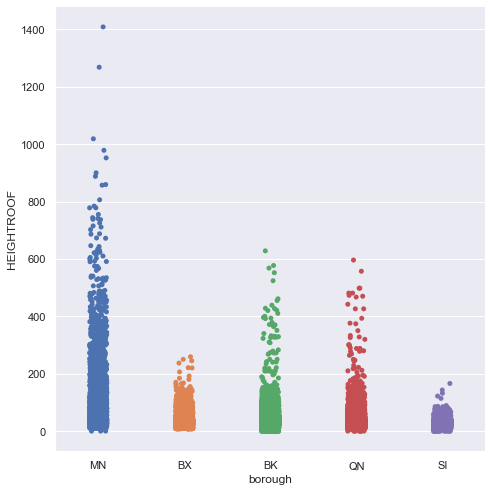

In [93]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            order=["MN", "BX", "BK", "QN", "SI"], 
            data=building_footprints, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-3-b')

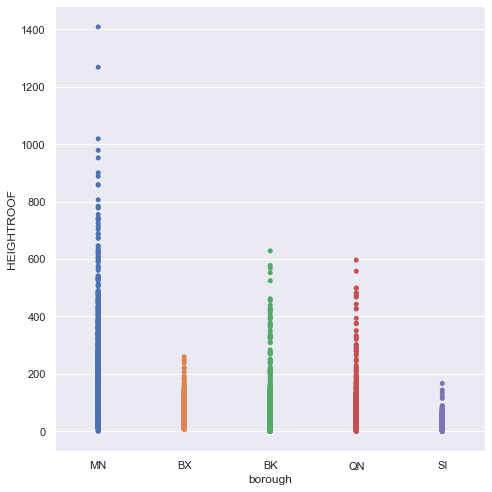

In [94]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            order=["MN", "BX", "BK", "QN", "SI"], 
            height=7, 
            jitter=False)

plt.tight_layout()
plt.savefig('figures/3-6-3-c')

### Scatter Plot - Swarm

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


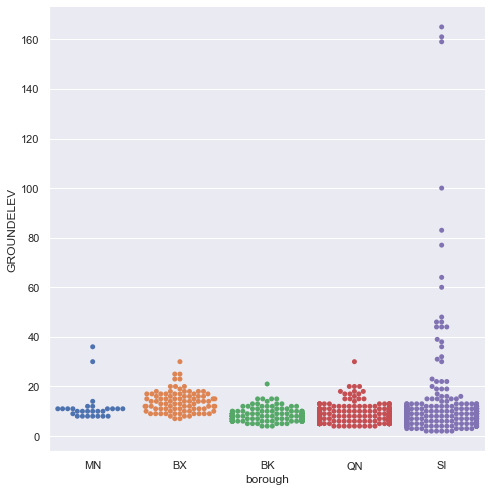

In [95]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
data = data.sample(1000)
order= ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            kind='swarm', 
            order=order, 
            data=data, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-4-a')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


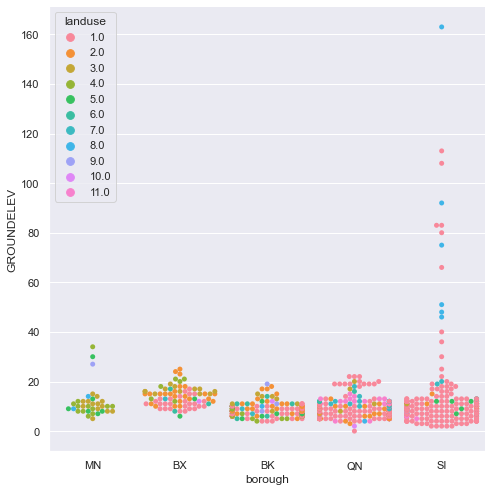

In [96]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
data = data.sample(1000)
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-4-b')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


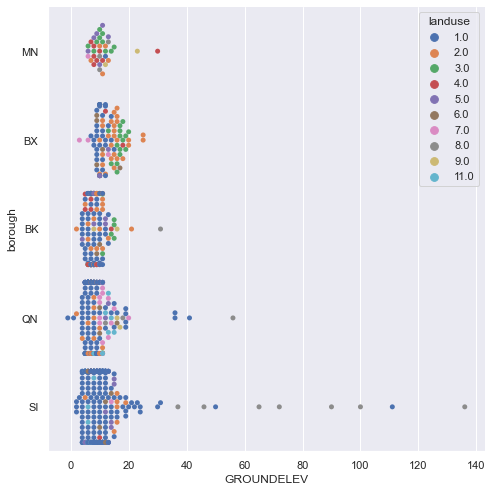

In [97]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
data = data.sample(1000)
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='GROUNDELEV', 
            y='borough', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-4-c')

### Box Plot

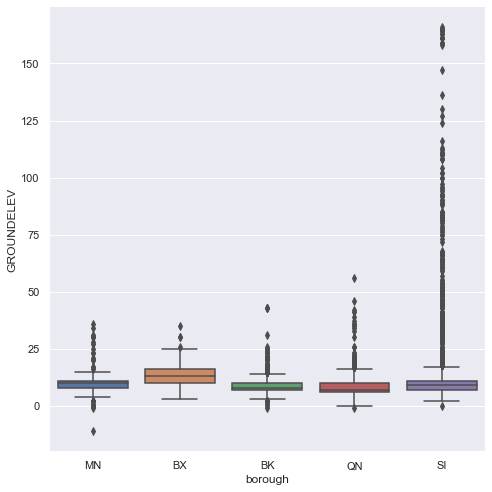

In [98]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-5-a')

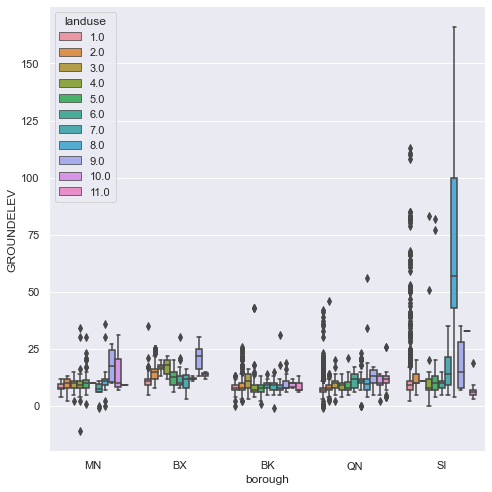

In [99]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            hue='landuse', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-5-b')

### Boxen Plot

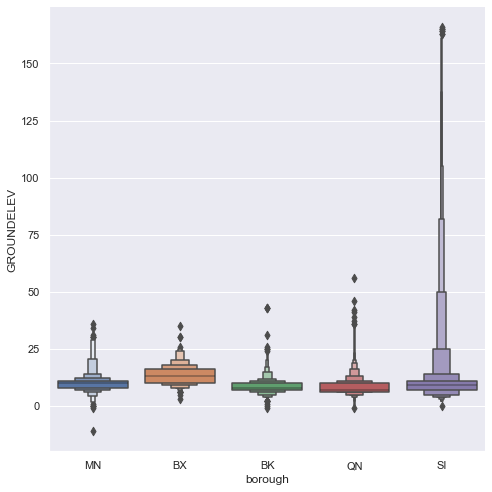

In [100]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()
plt.savefig('figures/3-6-6-a')

### Violin Plot

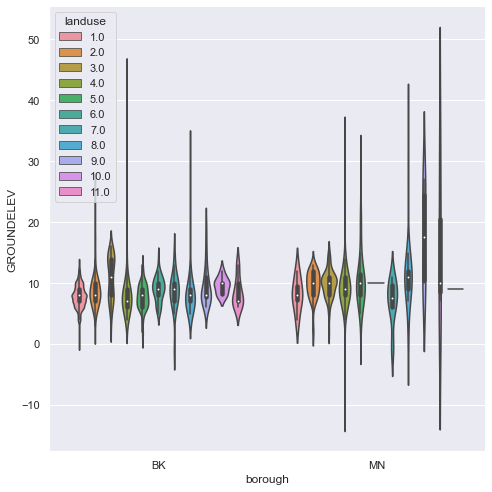

In [101]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-a')

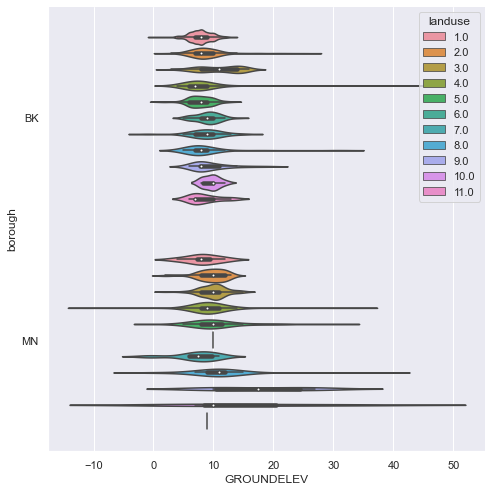

In [102]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-b')

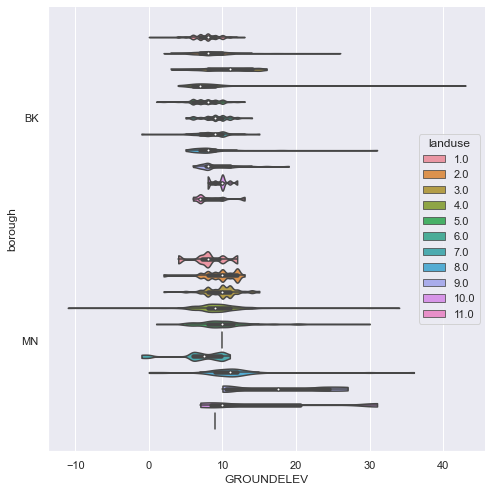

In [103]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data = data, 
            bw=.15, 
            cut=0, 
            height=7, 
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-c')

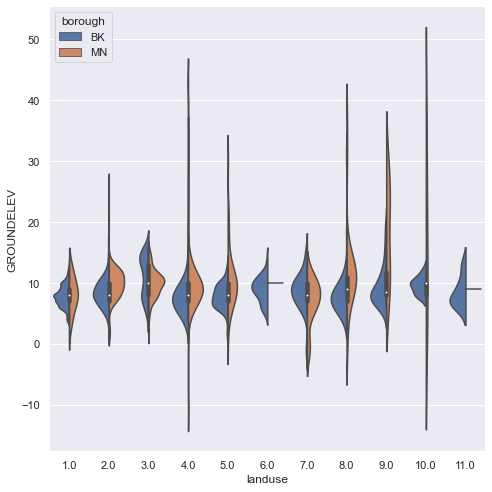

In [104]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            split=True, 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/3-6-7-d')

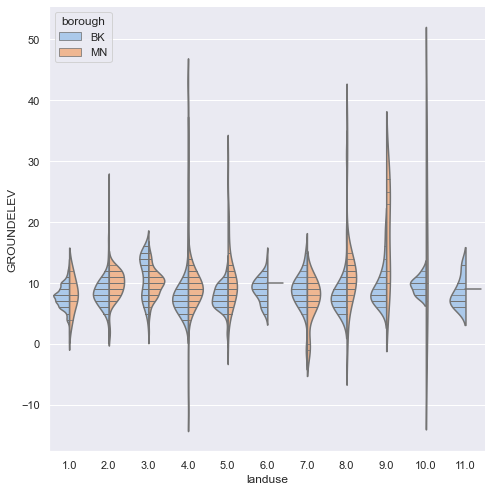

In [105]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            inner="stick", 
            split=True,
            palette="pastel", 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/3-6-7-e')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/s

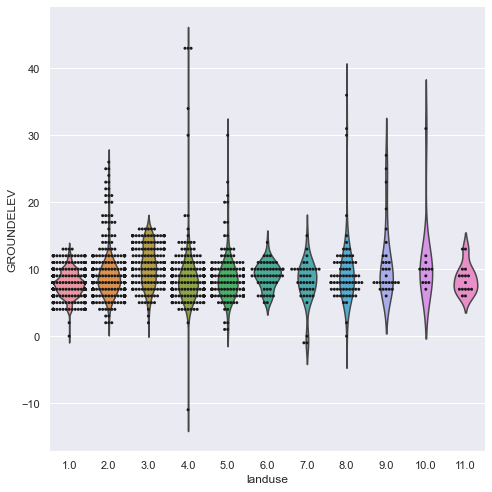

In [106]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

g = sns.catplot(x="landuse", 
                y="GROUNDELEV", 
                kind="violin", 
                inner=None, 
                data=data, 
                height=7)

sns.swarmplot(x="landuse", 
              y="GROUNDELEV", 
              color="k", 
              size=3, 
              data=data, 
              ax=g.ax)

plt.tight_layout()
plt.savefig('figures/3-6-7-f')

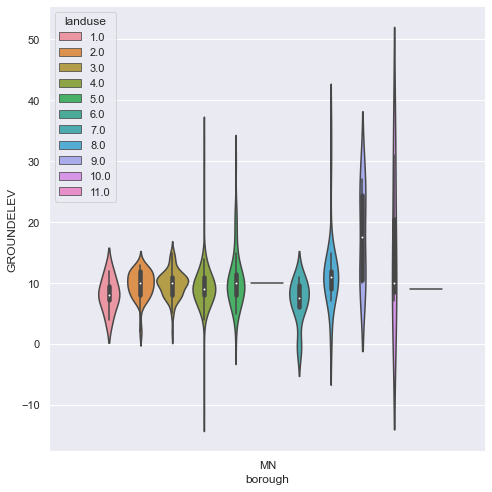

In [107]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-g')

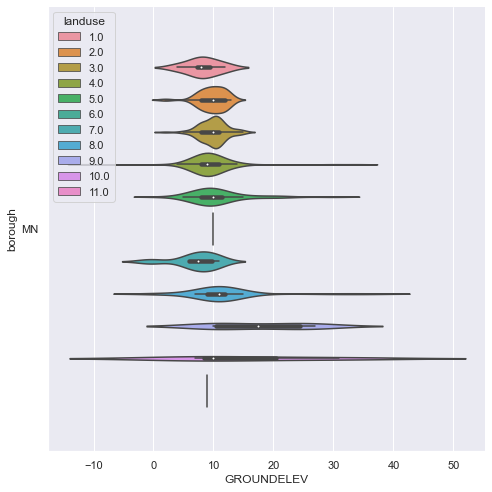

In [108]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-7-h')

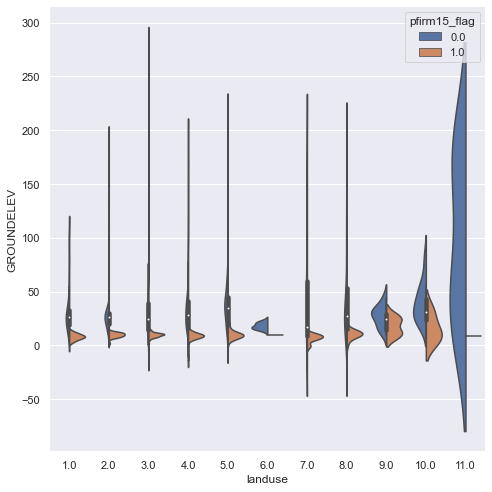

In [109]:
data = building_footprints.loc[building_footprints['borough'].isin(["MN"])]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="violin", 
            split=True, 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-7-i')

### Point Plot

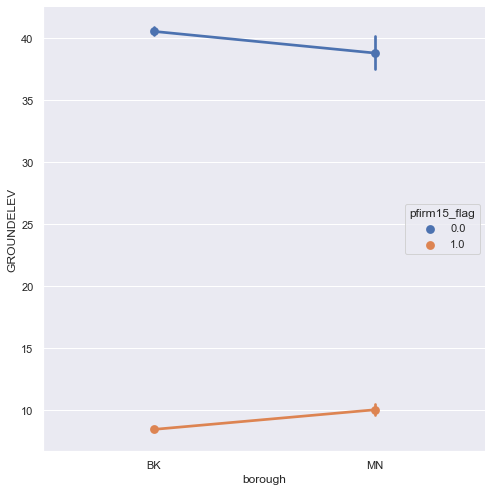

In [110]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height=7, 
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-a')

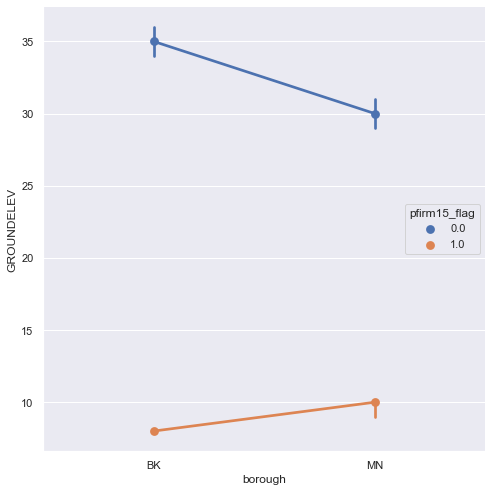

In [111]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height = 7, 
            estimator=np.median,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-b')

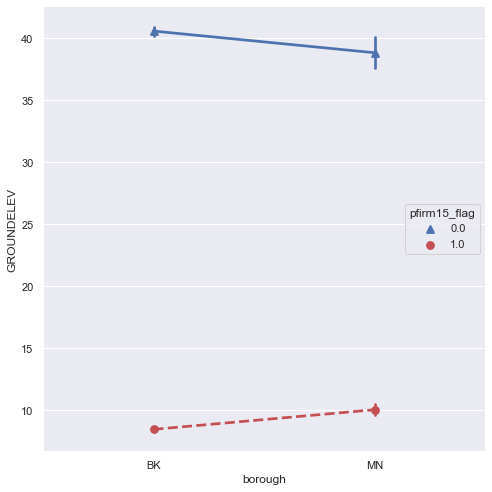

In [112]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag",
            palette={0.0: "b", 1.0: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", 
            data=data, 
            height = 7,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/3-6-8-c')

### Showing Multiple Relationships with Facets

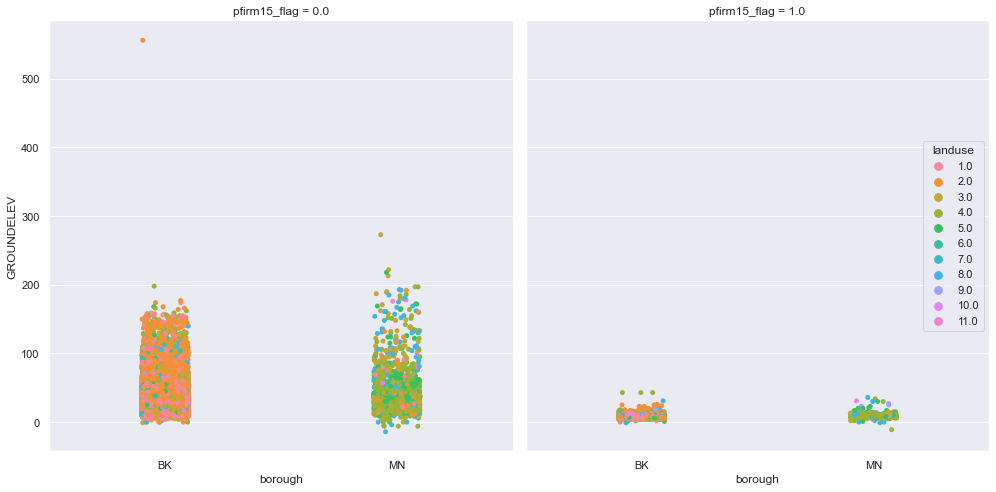

In [113]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV",
            hue="landuse",
            col="pfirm15_flag", 
            height = 7, 
            data=data,
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/3-6-9-a')

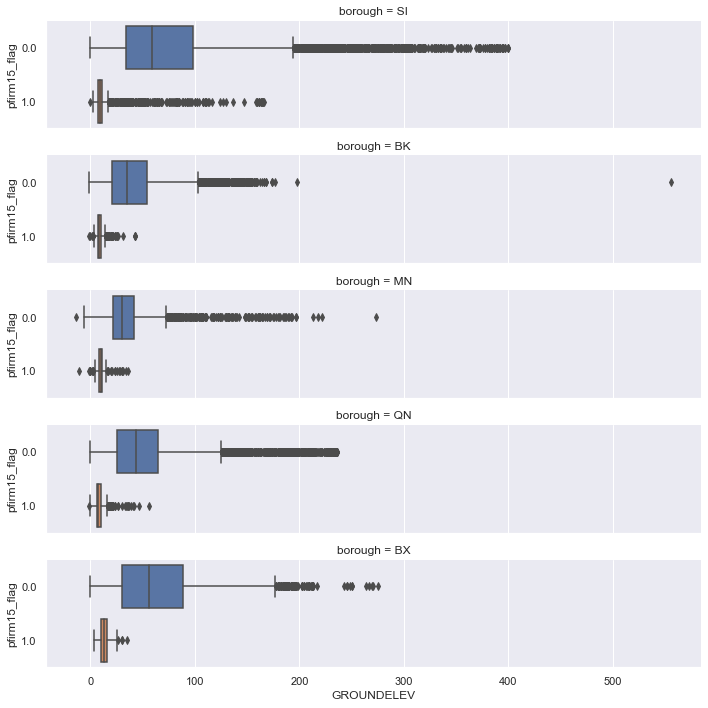

In [114]:
data = building_footprints

sns.catplot(x="GROUNDELEV", 
            y="pfirm15_flag", 
            row="borough",
            kind="box", 
            orient="h", 
            height = 2, 
            aspect = 5, 
            data=data)

plt.tight_layout()
plt.savefig('figures/3-6-9-b')

# 4. Plotting with Pandas 

## Line Plot

In [115]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1990   4101
1        1991   2468
2        1992   3532
3        1993   2848
4        1994   2643

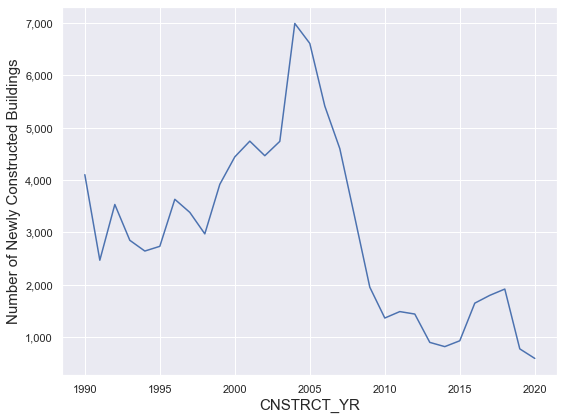

In [116]:
fig, ax = plt.subplots(figsize=(8,6))

by_year.plot(x='CNSTRCT_YR', 
             y='count', 
             legend=False, 
             ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('CNSTRCT_YR', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-a')

## Timeseries Plot

In [117]:
g = building_footprints.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)

g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')

g.index.dtype

dtype('<M8[ns]')

In [118]:
g.head()

CNSTRCT_YR  count
CNSTRCT_YR                   
1990-01-01      1990.0   4101
1991-01-01      1991.0   2468
1992-01-01      1992.0   3532
1993-01-01      1993.0   2848
1994-01-01      1994.0   2643

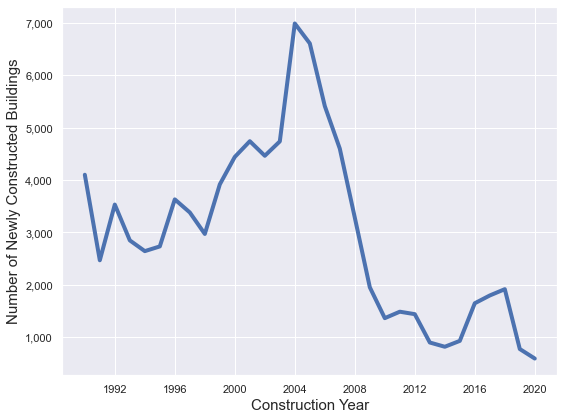

In [119]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(g['count'], 
        linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-b')

In [120]:
table = pd.pivot_table(building_footprints, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')
table.index = pd.to_datetime(table.index, format='%Y')

table.index.dtype

dtype('<M8[ns]')

In [121]:
table.head()

borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990-01-01  1022  525  55  565  1934
1991-01-01   477  461  37  402  1091
1992-01-01   783  687  35  454  1573
1993-01-01   528  687  19  476  1138
1994-01-01   393  301  54  661  1234

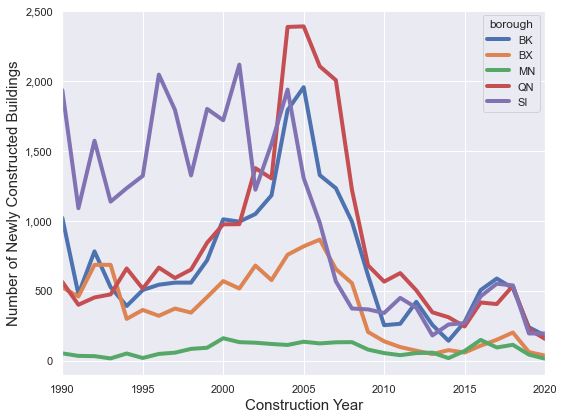

In [122]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(ax=ax, 
           linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-c')

In [123]:
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK    BX   MN    QN    SI
CNSTRCT_YR                             
1990-01-01  1022   525   55   565  1934
1991-01-01  1499   986   92   967  3025
1992-01-01  2282  1673  127  1421  4598
1993-01-01  2810  2360  146  1897  5736
1994-01-01  3203  2661  200  2558  6970

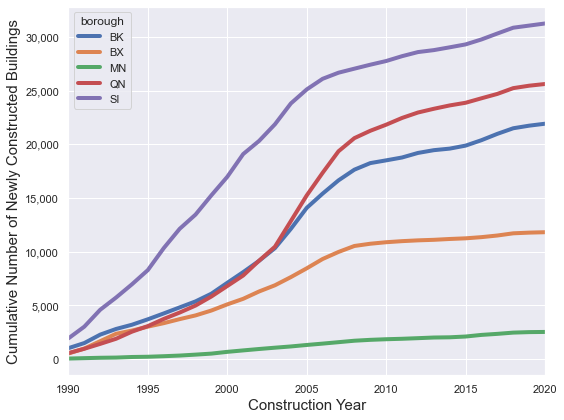

In [124]:
fig, ax = plt.subplots(figsize=(8,6))

table_cumsum.plot(ax=ax, 
                  linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-1-d')

## Bar Plot

In [125]:
bar = building_footprints.groupby('borough')['DOITT_ID'].count()
bar.rename("count", inplace=True)
bar.sort_values(ascending=False, inplace=True)
bar

borough
SI    31245
QN    25611
BK    21914
BX    11815
MN     2532
Name: count, dtype: int64

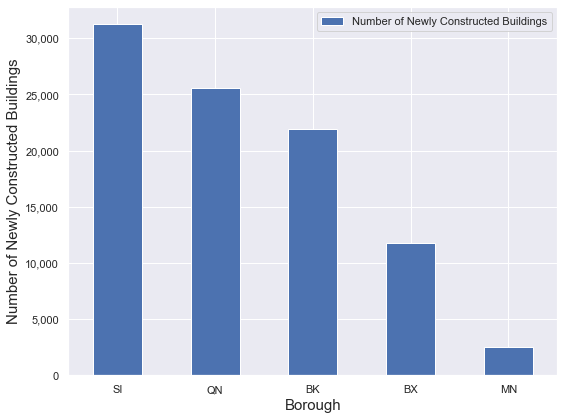

In [126]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot(kind='bar', 
         ax=ax, 
         label='Number of Newly Constructed Buildings')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-a')

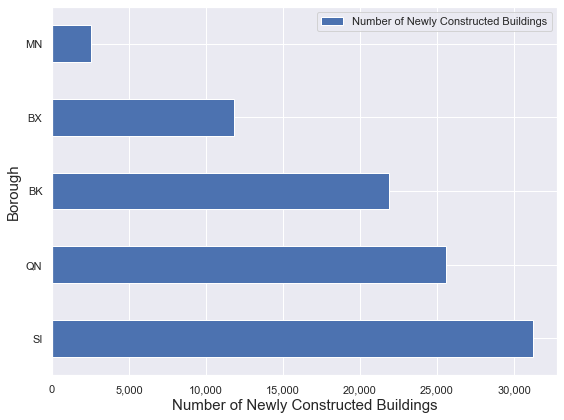

In [127]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot.barh(ax=ax, 
              label='Number of Newly Constructed Buildings')


# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Borough', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-b')

In [128]:
table = building_footprints[building_footprints['CNSTRCT_YR'].between(2000, 2020)]


table = pd.pivot_table(table, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')

table.index.dtype

dtype('int64')

In [129]:
table.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2000        1012  571  163   976  1719
2001         995  518  135   977  2116
2002        1050  682  131  1377  1223
2003        1183  578  122  1304  1550
2004        1791  759  115  2385  1938

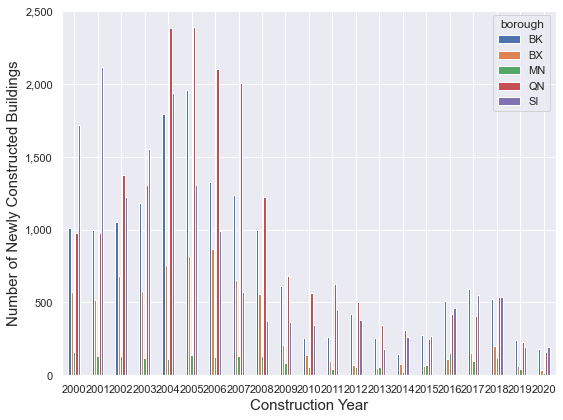

In [130]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(kind='bar', 
           ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-c')

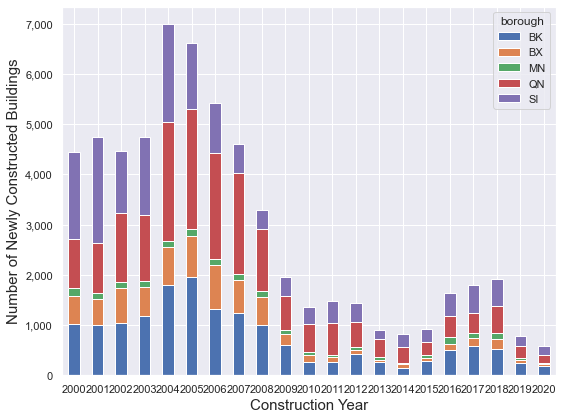

In [131]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot.bar(stacked=True, 
               ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-d')

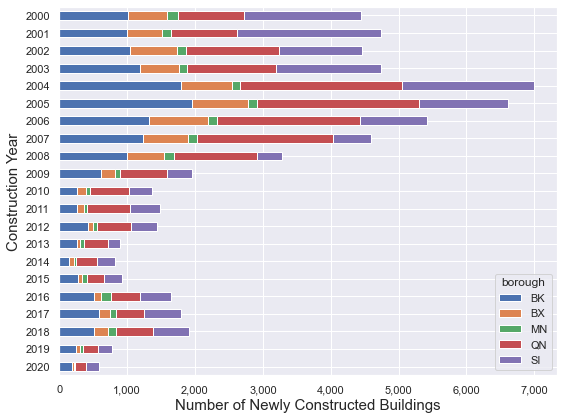

In [132]:
fig, ax = plt.subplots(figsize=(8,6))

table.sort_index(ascending=False).plot.barh(stacked=True, 
                                            ax=ax)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-2-e')

## Histograms

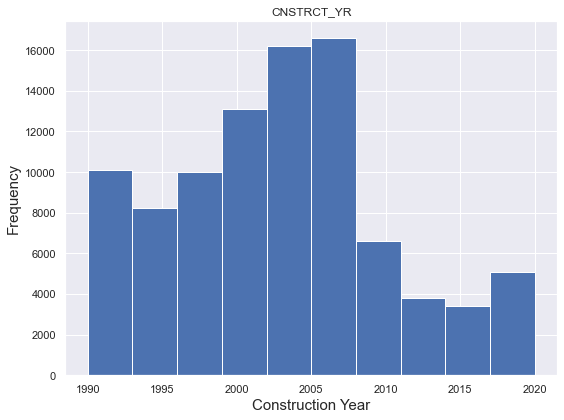

In [133]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-a')

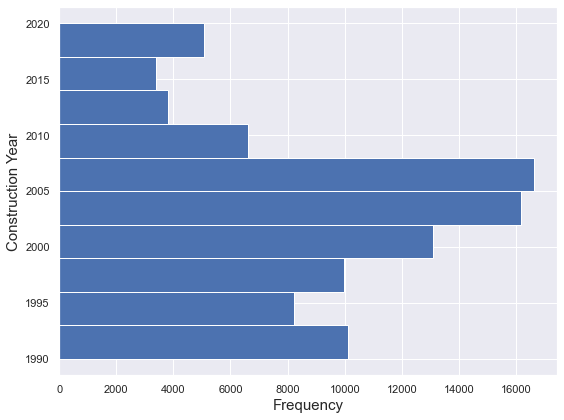

In [134]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=False)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-b')

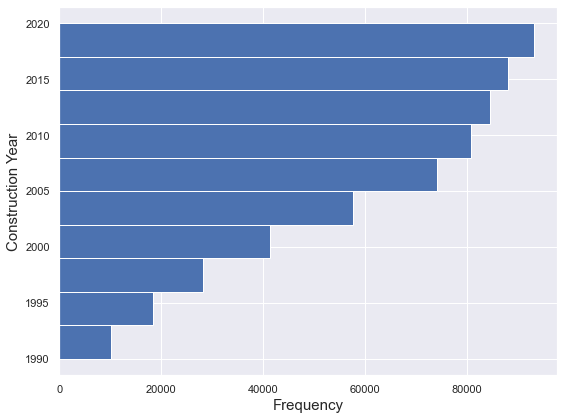

In [135]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=True)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-c')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


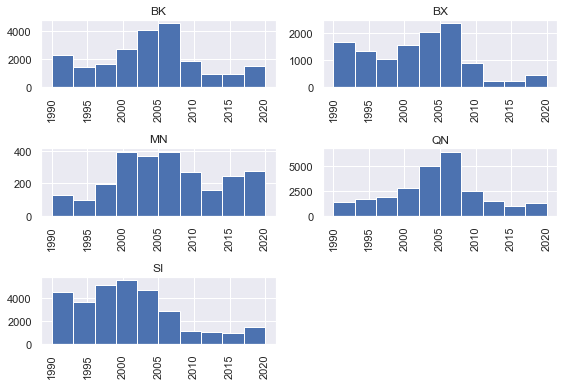

In [136]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR', 
                         by='borough')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/4-3-d')

In [137]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn['CNSTRCT_YR']
mn.rename('MN', inplace=True)

bk = bk['CNSTRCT_YR']
bk.rename('BK', inplace=True)

bx = bx['CNSTRCT_YR']
bx.rename('BX', inplace=True)

qn = qn['CNSTRCT_YR']
qn.rename('QN', inplace=True)

si = si['CNSTRCT_YR']
si.rename('SI', inplace=True)

0        1997.0
1        2001.0
2        1996.0
3        2000.0
8        1992.0
          ...  
93088    2007.0
93089    2001.0
93090    2007.0
93091    2008.0
93092    1991.0
Name: SI, Length: 31245, dtype: float64

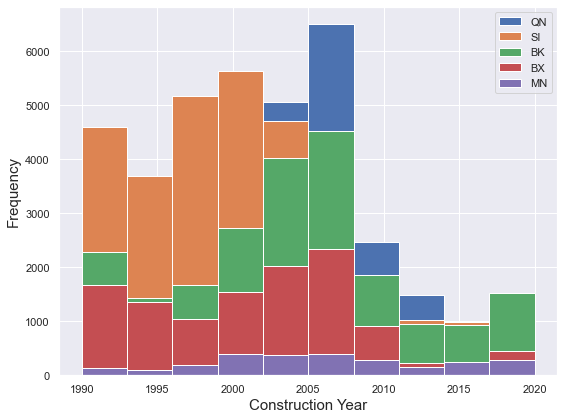

In [138]:
fig, ax = plt.subplots(figsize=(8,6))

qn.plot.hist(ax=ax)
si.plot.hist(ax=ax)
bk.plot.hist(ax=ax)
bx.plot.hist(ax=ax)
mn.plot.hist(ax=ax)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-e')

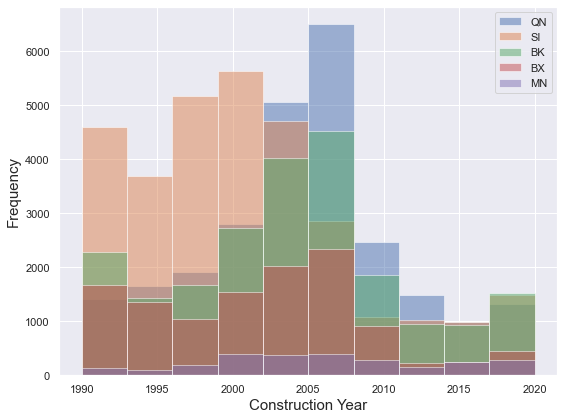

In [139]:
fig, ax = plt.subplots(figsize=(8,6))

qn.plot.hist(ax=ax, alpha=0.5)
si.plot.hist(ax=ax, alpha=0.5)
bk.plot.hist(ax=ax, alpha=0.5)
bx.plot.hist(ax=ax, alpha=0.5)
mn.plot.hist(ax=ax, alpha=0.5)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-3-f')

## Box Plot 

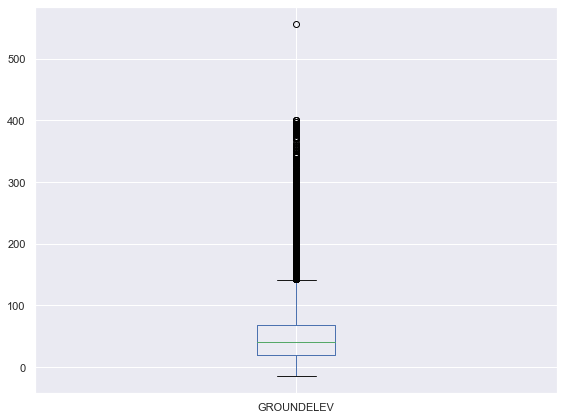

In [140]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()
plt.savefig('figures/4-4-a')

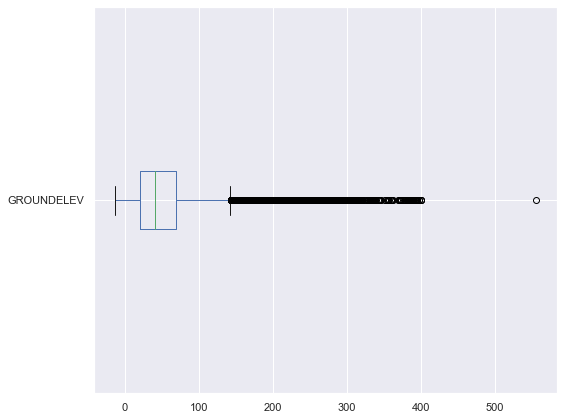

In [141]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)
plt.tight_layout()
plt.savefig('figures/4-4-b')

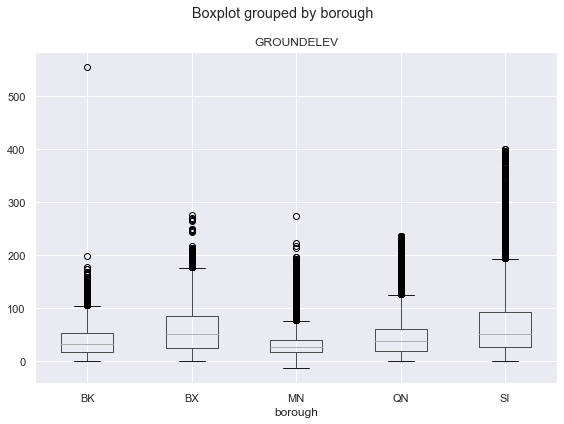

In [142]:
building_footprints_box = building_footprints[['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(8,6))

building_footprints_box.boxplot(by='borough', ax=ax)

plt.xlabel('borough')
plt.tight_layout()
plt.savefig('figures/4-4-c')

## Kernel Density Estimate Plot

In [143]:
building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

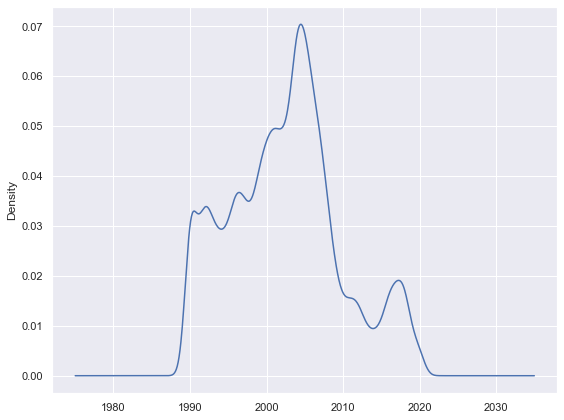

In [144]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.kde(ax=ax)

plt.tight_layout()
plt.savefig('figures/4-5-a')

## Area Plot

In [145]:
area = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc=pd.Series.nunique)

area.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
area.index = area.index.astype('int64')
area.index = pd.to_datetime(area.index, format='%Y')
                             
area.head()

borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990-01-01  1022  525  55  565  1934
1991-01-01   477  461  37  402  1091
1992-01-01   783  687  35  454  1573
1993-01-01   528  687  19  476  1138
1994-01-01   393  301  54  661  1234

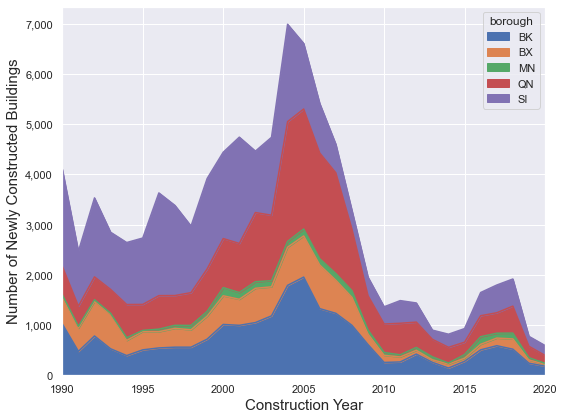

In [146]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-a')

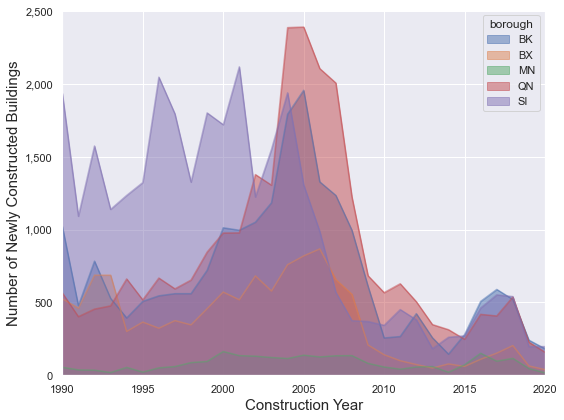

In [147]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-b')

In [148]:
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK    BX   MN    QN    SI
CNSTRCT_YR                             
1990-01-01  1022   525   55   565  1934
1991-01-01  1499   986   92   967  3025
1992-01-01  2282  1673  127  1421  4598
1993-01-01  2810  2360  146  1897  5736
1994-01-01  3203  2661  200  2558  6970

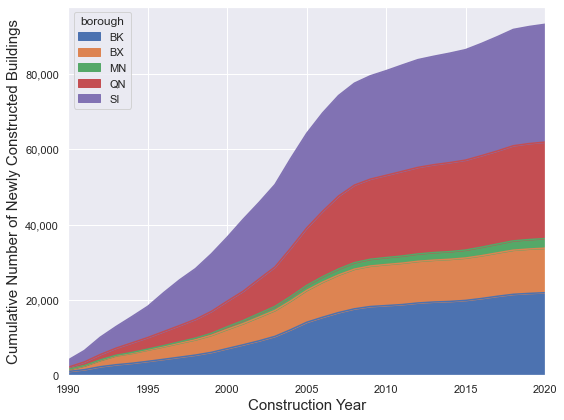

In [149]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-c')

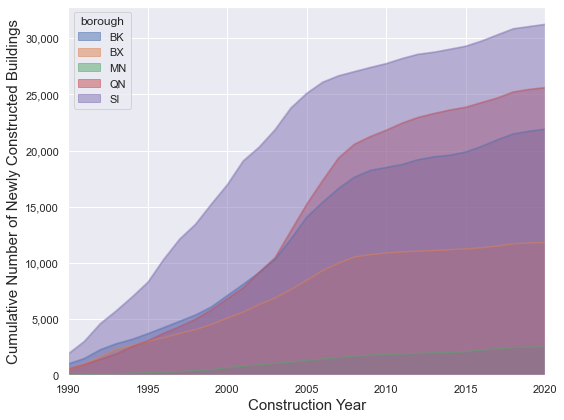

In [150]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-6-d')

## Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


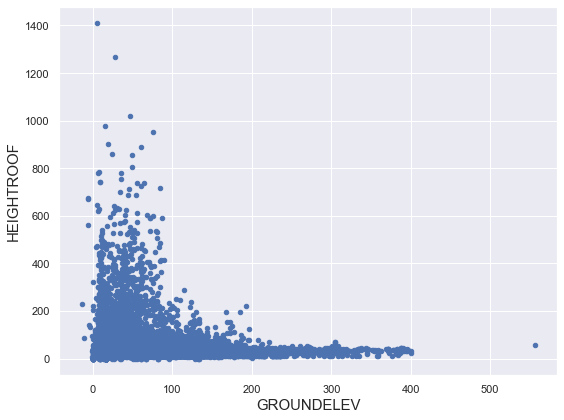

In [151]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-a')

In [152]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn[['GROUNDELEV', 'HEIGHTROOF']]
bk = bk[['GROUNDELEV', 'HEIGHTROOF']]
bx = bx[['GROUNDELEV', 'HEIGHTROOF']]
qn = qn[['GROUNDELEV', 'HEIGHTROOF']]
si = si[['GROUNDELEV', 'HEIGHTROOF']]

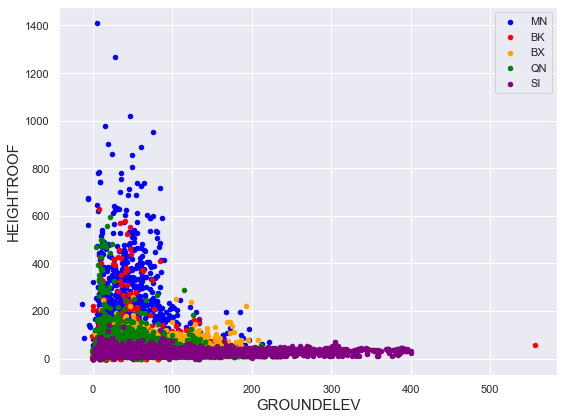

In [153]:
fig, ax = plt.subplots(figsize=(8,6))

mn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='blue', label='MN', ax=ax)
bk.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='red', label='BK', ax=ax)
bx.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='orange', label='BX', ax=ax)
qn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='green', label='QN', ax=ax)
si.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='purple', label='SI', ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-b')

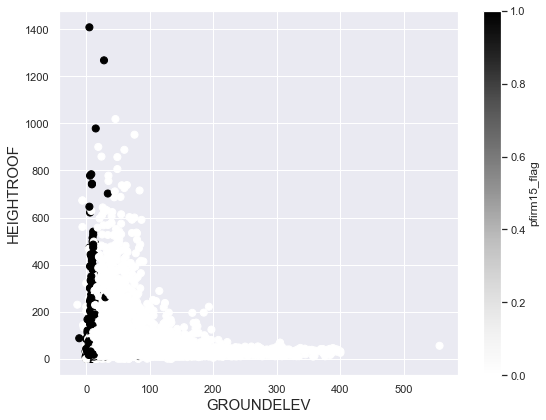

In [154]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 c='pfirm15_flag', 
                                 s=50, 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/4-7-c')

## Hexagonal Bin Plot

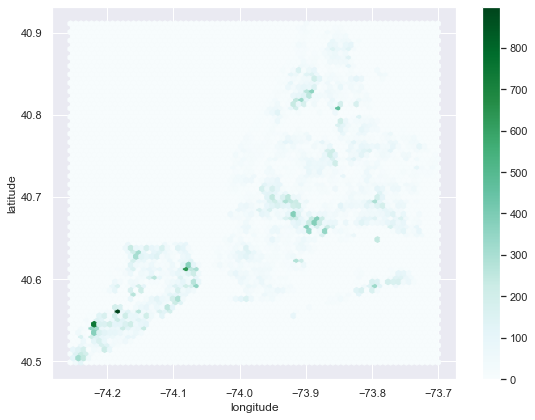

In [155]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                gridsize=70, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-a')

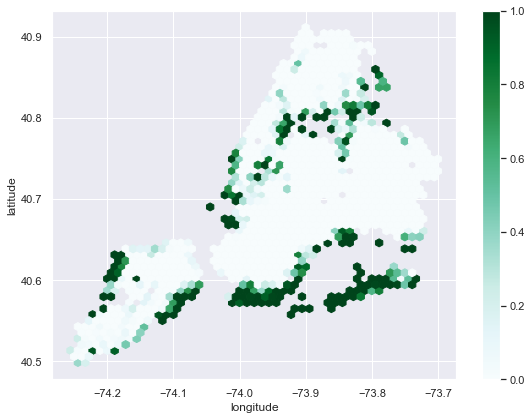

In [156]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                gridsize=50, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-b')

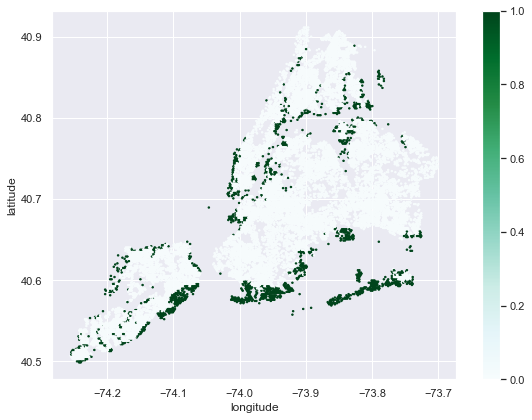

In [157]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                reduce_C_function=np.max, 
                                gridsize=255, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/4-8-c')

## Pie Plot

In [158]:
pie = building_footprints.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
SI    31245
QN    25611
BK    21914
BX    11815
MN     2532
Name: count, dtype: int64

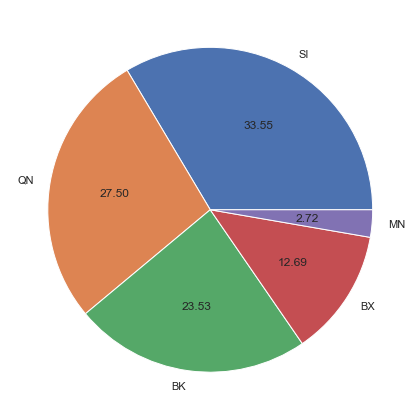

In [159]:
ax = pie.plot.pie(figsize=(8,6), 
                  autopct='%.2f') 

ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('figures/4-9-a')

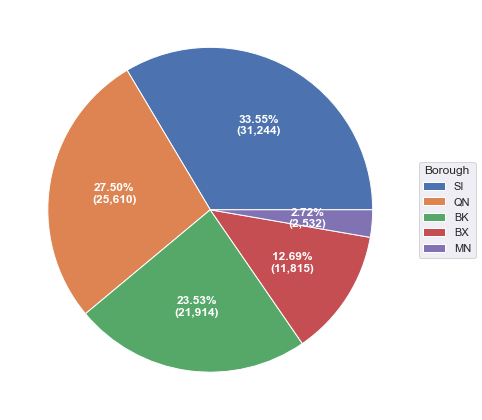

In [160]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, 
                                  autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, 
          pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()
plt.savefig('figures/4-9-b')

# 5. Conclusion

In this notebook, we reviewed various types of plots and visualizations using the Python libraries seaborn and pandas, both built on top of the library matplotlib. In Part IV, we will demonstrate how to work with geospatial data and create various types of maps with the Python library geopandas.